In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob as glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
import pickle

os.chdir(r'F:\validation data\TRPRF')
os.listdir()
glob.glob('*.csv')

le = pd.read_csv('TRPRF_1d_LE.csv')
le['date'] = pd.to_datetime(le['date'])
print(le.columns)
le.drop(le.iloc[:,[1]], axis = 1, inplace = True)
era5 = pd.read_csv('merge_TRP_ERA5_1d_df.csv')
era5.drop(era5.iloc[:, [0, 2, 3]], axis = 1, inplace = True)
era5['date'] = pd.to_datetime(era5['date'])
complete = pd.merge(le, era5, on = 'date')
complete.to_csv('complete_df.csv', index = False)
complete

In [2]:
pd.read_csv(r'/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/validation data/ALS/complete_df.csv')

date         LE        ws        t2m          sp        ssrd  \
0     2010-01-01  23.567787  1.856722  11.077478  817.402031  151.269444   
1     2010-01-02  18.227945  1.059069   9.889856  819.559609  194.182760   
2     2010-01-03  27.914696  1.333110  10.445764  818.174453  196.901788   
3     2010-01-04  57.101536  2.086002  11.358636  814.464922  197.137309   
4     2010-01-05  37.987171  1.849963  11.851709  816.049062  193.983177   
...          ...        ...       ...        ...         ...         ...   
1821  2014-12-27  29.691980  1.164788  11.933771  821.638984  174.476962   
1822  2014-12-28  16.586382  1.262128   9.542719  824.210078   81.333429   
1823  2014-12-29  20.987532  1.326172  10.215387  820.457578   77.678689   
1824  2014-12-30  34.701195  1.145304  12.079950  819.826172  155.001233   
1825  2014-12-31  35.544880  1.511696  13.299493  822.390000  181.443993   

            strd        tp     swvl1         rh       vpd  
0     276.936528  0.000937  0.220904  49.275906  0.066950  
1     254.326319  0.000000  0.219242  41.092042  0.071826  
2     253.492830  0.000000  0.217382  39.636692  0.076390  
3     256.057552  0.000000  0.214225  38.637492  0.082517  
4     262.859149  0.000000  0.210761  39.690878  0.083789  
...          ...       ...       ...        ...       ...  
1821  280.829913  0.012379  0.250305  55.446070  0.062236  
1822  324.377118  0.049831  0.252398  64.225069  0.042615  
1823  313.304618  0.005962  0.251214  74.585281  0.031671  
1824  298.662396  0.001047  0.247289  59.150962  0.057613  
1825  298.911667  0.000001  0.243656  59.432136  0.061980  

[1826 rows x 11 columns]

In [3]:
als = pd.read_csv('/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/validation data/ALS/complete_df.csv')
als['site'] = ['ALS' for i in range(len(als))]
#bns = pd.read_csv('F:\\validation data\\BNS\\complete_df.csv')
#bns['site'] = ['BNS' for i in range(len(bns))]
#bns.drop(['slhf', 'ssr', 'str'], axis = 1, inplace = True)
clm = pd.read_csv('/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/validation data/CLM/complete_df.csv')
clm['site'] = ['CLM' for i in range(len(clm))]
clm.drop(['slhf', 'ssr', 'str'], axis = 1, inplace = True)
knp = pd.read_csv('/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/validation data/KNP/complete_df.csv')
knp['site'] = ['KNP' for i in range(len(knp))]
knp.drop(['slhf', 'ssr', 'str'], axis = 1, inplace = True)
knp.rename({'LE_f':'LE'}, axis = 1, inplace = True)
qyz = pd.read_csv('/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/validation data/QYZ/complete_df.csv')
qyz['site'] = ['QYZ' for i in range(len(qyz))]
qyz.drop(['slhf', 'ssr', 'str'], axis = 1, inplace = True)
twh = pd.read_csv('/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/validation data/TWH/complete_df.csv')
twh['site'] = ['TWH' for i in range(len(twh))]
twh.drop(['slhf', 'ssr', 'str'], axis = 1, inplace = True)
bns = pd.read_csv('/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/validation data/TRPRF/complete_df.csv')
#trprf['site'] = ['TRPRF' for i in range(len(trprf))]
bns['site'] = ['BNS' for i in range(len(bns))]

In [4]:
dfs = [als,bns, clm, knp, qyz, twh]
for df in dfs:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = pd.to_datetime(df['date']).dt.year
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['doy'] = pd.to_datetime(df['date']).dt.day_of_year

In [5]:
als

date         LE        ws        t2m          sp        ssrd  \
0    2010-01-01  23.567787  1.856722  11.077478  817.402031  151.269444   
1    2010-01-02  18.227945  1.059069   9.889856  819.559609  194.182760   
2    2010-01-03  27.914696  1.333110  10.445764  818.174453  196.901788   
3    2010-01-04  57.101536  2.086002  11.358636  814.464922  197.137309   
4    2010-01-05  37.987171  1.849963  11.851709  816.049062  193.983177   
...         ...        ...       ...        ...         ...         ...   
1821 2014-12-27  29.691980  1.164788  11.933771  821.638984  174.476962   
1822 2014-12-28  16.586382  1.262128   9.542719  824.210078   81.333429   
1823 2014-12-29  20.987532  1.326172  10.215387  820.457578   77.678689   
1824 2014-12-30  34.701195  1.145304  12.079950  819.826172  155.001233   
1825 2014-12-31  35.544880  1.511696  13.299493  822.390000  181.443993   

            strd        tp     swvl1         rh       vpd site  year  month  \
0     276.936528  0.000937  0.220904  49.275906  0.066950  ALS  2010      1   
1     254.326319  0.000000  0.219242  41.092042  0.071826  ALS  2010      1   
2     253.492830  0.000000  0.217382  39.636692  0.076390  ALS  2010      1   
3     256.057552  0.000000  0.214225  38.637492  0.082517  ALS  2010      1   
4     262.859149  0.000000  0.210761  39.690878  0.083789  ALS  2010      1   
...          ...       ...       ...        ...       ...  ...   ...    ...   
1821  280.829913  0.012379  0.250305  55.446070  0.062236  ALS  2014     12   
1822  324.377118  0.049831  0.252398  64.225069  0.042615  ALS  2014     12   
1823  313.304618  0.005962  0.251214  74.585281  0.031671  ALS  2014     12   
1824  298.662396  0.001047  0.247289  59.150962  0.057613  ALS  2014     12   
1825  298.911667  0.000001  0.243656  59.432136  0.061980  ALS  2014     12   

      doy  
0       1  
1       2  
2       3  
3       4  
4       5  
...   ...  
1821  361  
1822  362  
1823  363  
1824  364  
1825  365  

[1826 rows x 15 columns]

In [6]:
ALS_ET = {}
for y in als.year.unique():
    als_ET = ((als[als['year'] == y]['LE']*24*3600).sum())/(2.25*10**6)
    ALS_ET[y] = als_ET
    
KNP_ET = {}
for y in knp.year.unique():
    knp_ET = ((knp[knp['year'] == y]['LE']*24*3600).sum())/(2.25*10**6)
    KNP_ET[y] = knp_ET
    
QYZ_ET = {}
for y in qyz.year.unique():
    ET = ((qyz[qyz['year'] == y]['LE']*24*3600).sum())/(2.25*10**6)
    QYZ_ET[y] = ET
    
BNS_ET = {}
for y in bns.year.unique():
    ET = ((bns[bns['year'] == y]['LE']*24*3600).sum())/(2.25*10**6)
    BNS_ET[y] = ET
    
TWH_ET = {}
for y in twh.year.unique():
    ET = ((twh[twh['year'] == y]['LE']*24*3600).sum())/(2.25*10**6)
    TWH_ET[y] = ET

In [7]:
27750**2

770062500

In [8]:
ALS_pt = {}
for y in als.year.unique():
    als_ET = sum(als[als['year']==y].tp*25)
    ALS_pt[y] = als_ET
    
KNP_pt = {}
for y in knp.year.unique():
    knp_ET = sum(knp[knp['year']==y].tp*25)
    KNP_pt[y] = knp_ET
    
QYZ_pt = {}
for y in qyz.year.unique():
    ET = sum(qyz[qyz['year']==y].tp*25)
    QYZ_pt[y] = ET
    
BNS_pt = {}
for y in bns.year.unique():
    ET = sum(bns[bns['year']==y].tp*25)
    BNS_pt[y] = ET
    
TWH_pt = {}
for y in twh.year.unique():
    ET = sum(twh[twh['year']==y].tp*25)
    TWH_pt[y] = ET

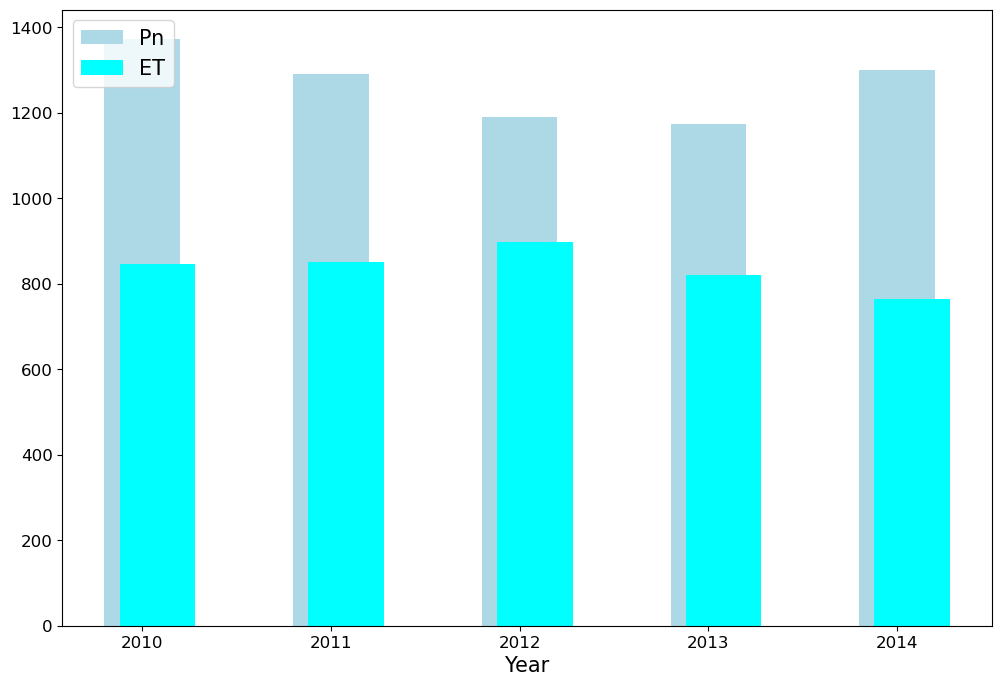

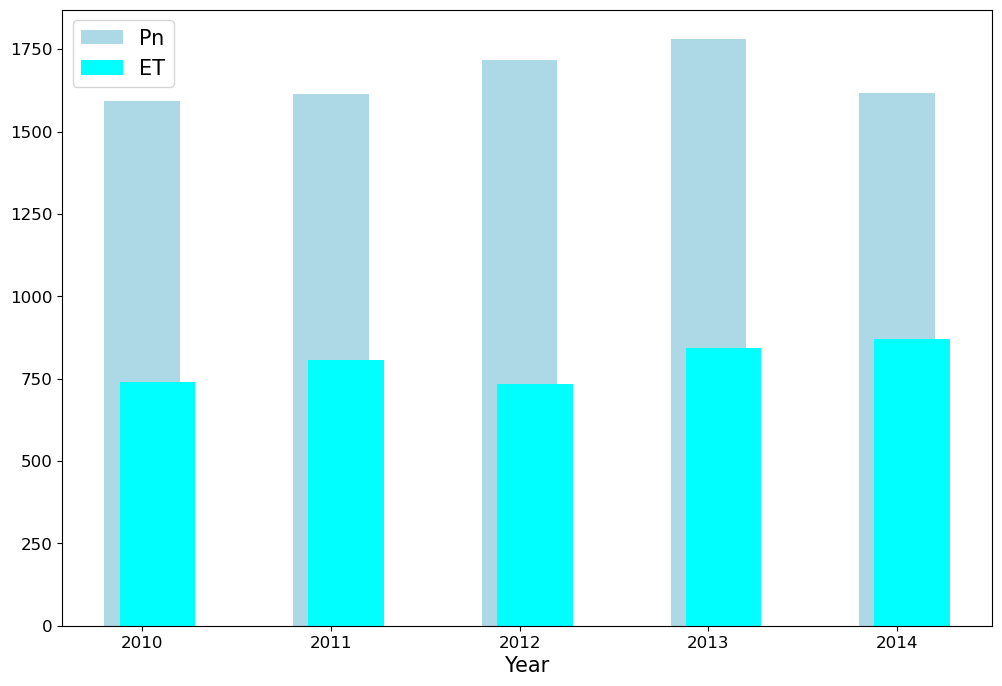

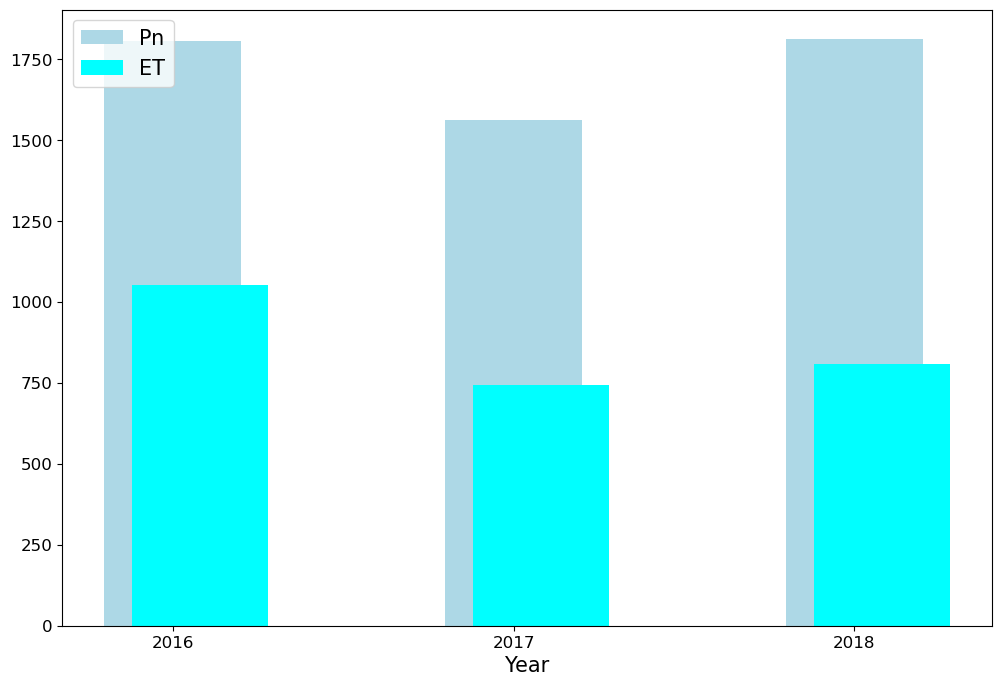

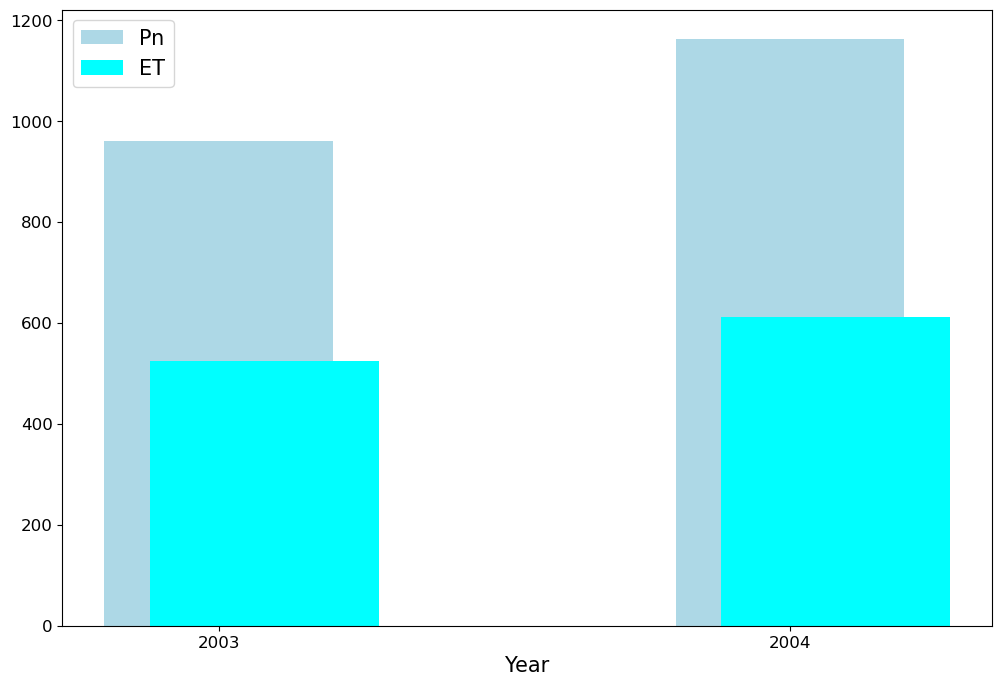

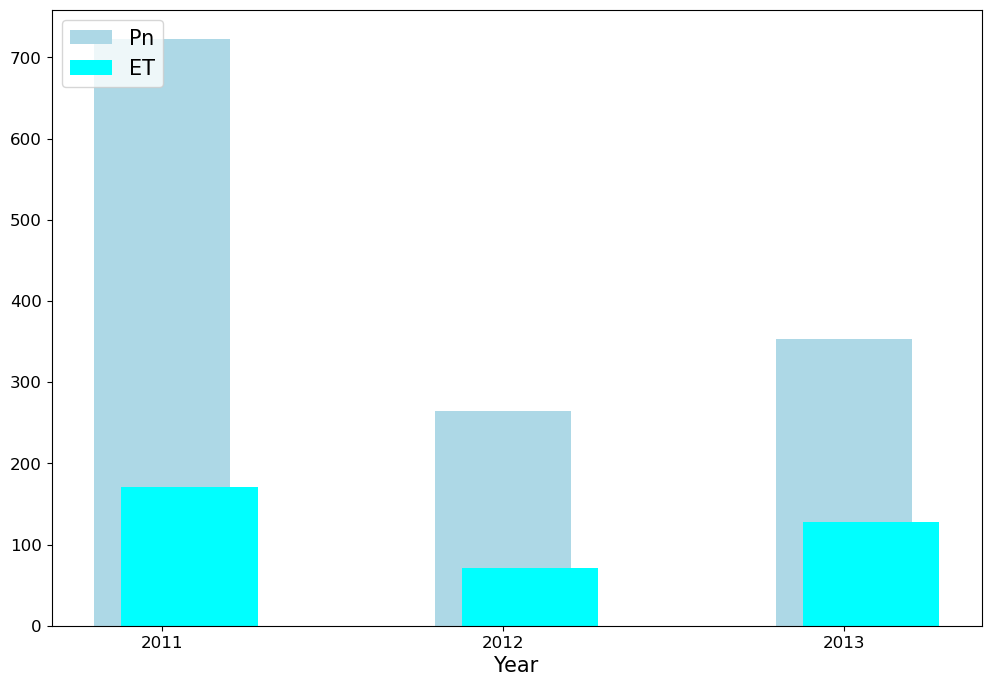

In [9]:
KNP_ET = {2016:1052, 2017:745, 2018:810}
KNP_pt = {2016:1808, 2017:1564, 2018:1813}
ET = [ALS_ET, BNS_ET, KNP_ET, QYZ_ET, TWH_ET]
PT = [ALS_pt, BNS_pt, KNP_pt, QYZ_pt, TWH_pt]
site = ['ALS', 'BNS', 'KNP', 'QYZ', 'TWH']
# plt.figure(figsize = (15, 20))
for i in range(5):
    plt.figure(figsize = (12,8))
    year = np.array(list(ET[i].keys())).astype(int)
    et = np.array(list(ET[i].values()))
    tp = np.array(list(PT[i].values()))
    wb = tp - et
#     plt.subplot(3,2,i+1)
#     plt.title(site[i], fontsize = 15)
    plt.bar(year,
            tp,
            width = .4,
            label = 'Pn', color = 'lightblue')
    plt.bar(year+.08,
            et,
            width = .4, label = 'ET', color = 'aqua')
    plt.xticks(year, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.legend(fontsize = 15, loc = 'upper left')
    plt.xlabel('Year', fontsize = 15)
    #plt.yticks([])

#     plt.savefig('plots3/'+str(site[i])+'water bugete_600dpi.png', dpi = 600)

In [15]:
ALS_pt.keys()

dict_keys([2010, 2011, 2012, 2013, 2014])

TypeError: unsupported operand type(s) for -: 'dict_values' and 'dict_values'

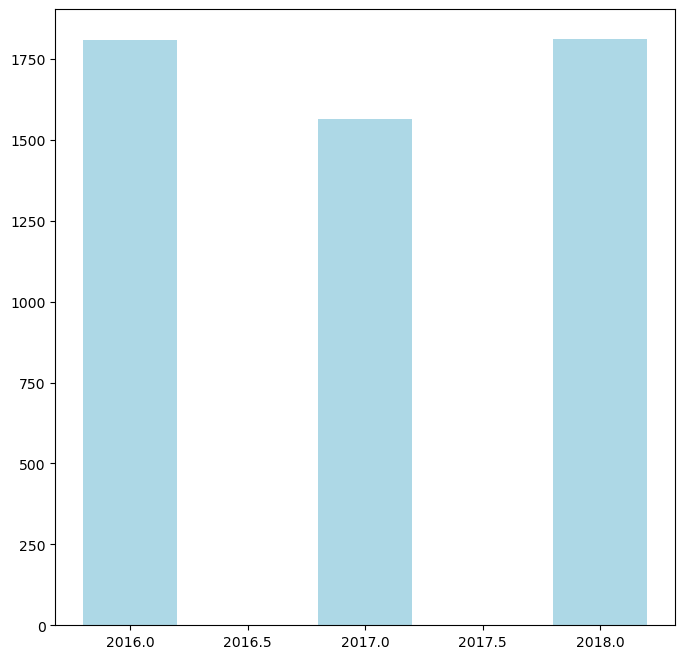

In [11]:
plt.figure(figsize = (8,8))
plt.bar(np.array([2016, 2017, 2018]), KNP_pt.values(), width = .4, label = 'Total precipitation', color = 'lightblue')
plt.bar(np.array([2016, 2017, 2018]), KNP_pt.values()-KNP_ET.values(), width = .4, label = 'Evapotranspiration', color = 'aqua')
#plt.bar(wb_df['year'], wb_df['ETy'],width = .4, label = 'Total LE', color = 'aqua')

plt.legend()
plt.xticks([2016, 2017, 2018])
plt.xlabel('Year', fontsize = 15)
plt.ylabel('(kg m$^2$ y$^{-1}$)', fontsize = 15)
plt.title('Water BUdget at KNP', fontsize = 20)
plt.savefig(r'F:\figure\water bodget', dpi = 300)
plt.show()

In [12]:
for df in dfs:
    print(df.year.unique())

[2010 2011 2012 2013 2014]
[2010 2011 2012 2013 2014]
[2007 2008 2009]
[2016 2017 2018]
[2003 2004]
[2011 2012 2013]


In [13]:
als_train = als[als['year'].isin([2010,2011,2012,2013])]
bns_train = bns[bns['year'].isin([2010,2011,2013, 2014])]
clm_train = clm[clm['year'].isin([2008,2007])]
knp_train = knp[knp['year'].isin([2017, 2016])]
qyz_train = qyz[qyz['year'].isin([2003])]
twh_train = twh[twh['year'].isin([2012, 2011])]
#trprf_train = trprf[trprf['year'].isin([2010,2011,2013,2014])]

als_test = als[als['year'].isin([2014])]
bns_test = bns[bns['year'].isin([2012])]
clm_test = clm[clm['year'].isin([2009])]
knp_test = knp[knp['year'].isin([2018])]
qyz_test = qyz[qyz['year'].isin([2004])]
twh_test = twh[twh['year'].isin([2013])]
#trprf_test = trprf[trprf['year'].isin([2012])]

train = [als_train,bns_train, knp_train, qyz_train, twh_train]
test = [als_test, bns_test, knp_test, qyz_test, twh_test]

train_df = pd.concat(train, axis = 0).reset_index(drop = True)
#train_df.drop(['slhf', 'ssr', 'str'], axis = 1, inplace = True)
print(train_df.columns)

Index(['date', 'LE', 'ws', 't2m', 'sp', 'ssrd', 'strd', 'tp', 'swvl1', 'rh',
       'vpd', 'site', 'year', 'month', 'doy'],
      dtype='object')


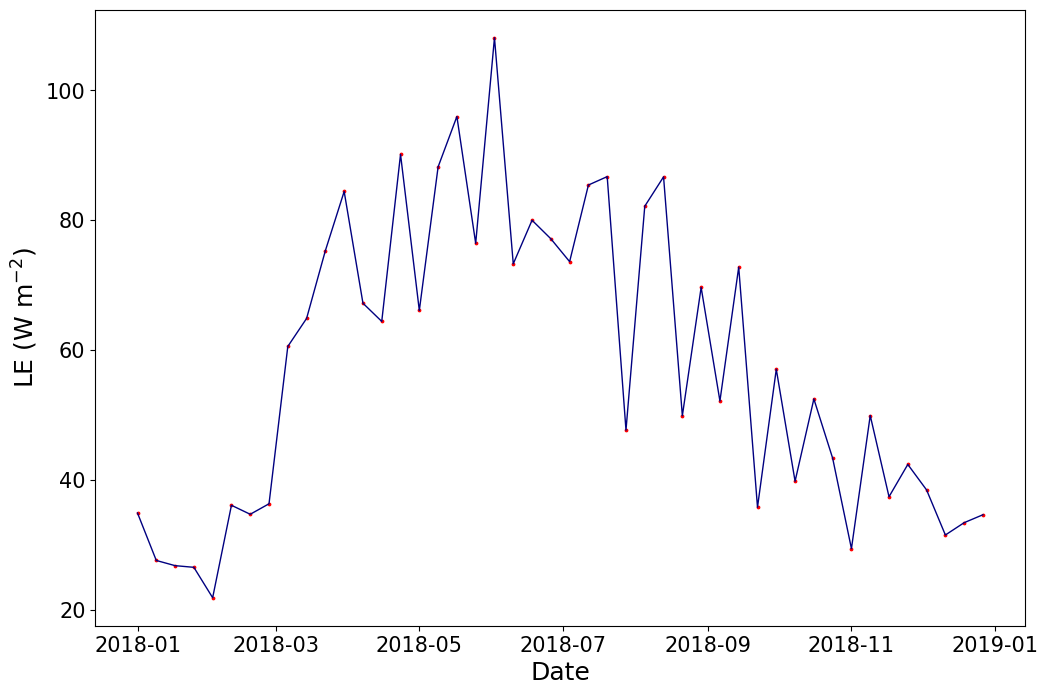

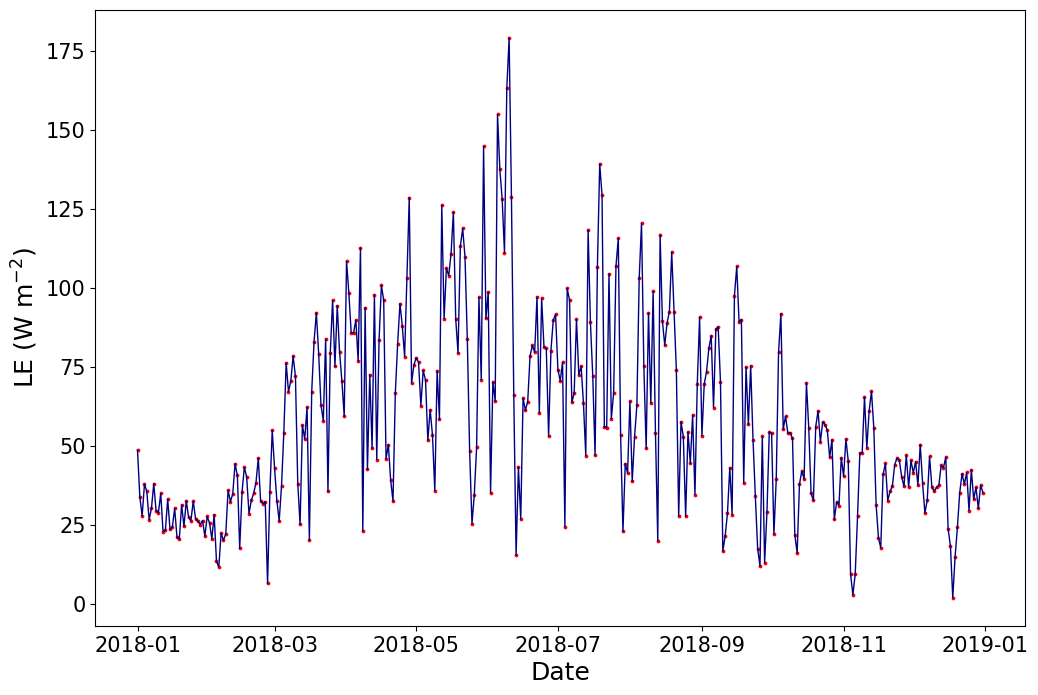

In [15]:
k = pd.read_csv(r'/media/krishna/297d584d-f229-4f8a-be6e-d8b11c336922/IITM project/knp big area/knp_tower_measured_LE.csv')
knp['date'] = pd.to_datetime(k['date'])
k = k[k['Year']==2018]
k['date'] = pd.to_datetime(k['date'])
plt.figure(figsize = (12,8))
plt.scatter(k.date, k.LE_f, s = 3, c = 'r')
plt.plot(k.date, k.LE_f, lw = 1, c = 'navy')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('LE (W m$^{-2}$)', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.savefig('F:\m.tech thesis\knp2018_8dLE.png', dpi  = 300)
plt.show()
plt.figure(figsize = (12,8))
plt.scatter(knp_test.date, knp_test.LE, s = 3, c = 'r')
plt.plot(knp_test.date, knp_test.LE, lw = 1, c = 'navy')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('LE (W m$^{-2}$)', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.savefig('F:\m.tech thesis\knp2018_1dLE.png', dpi  = 300)
plt.show()

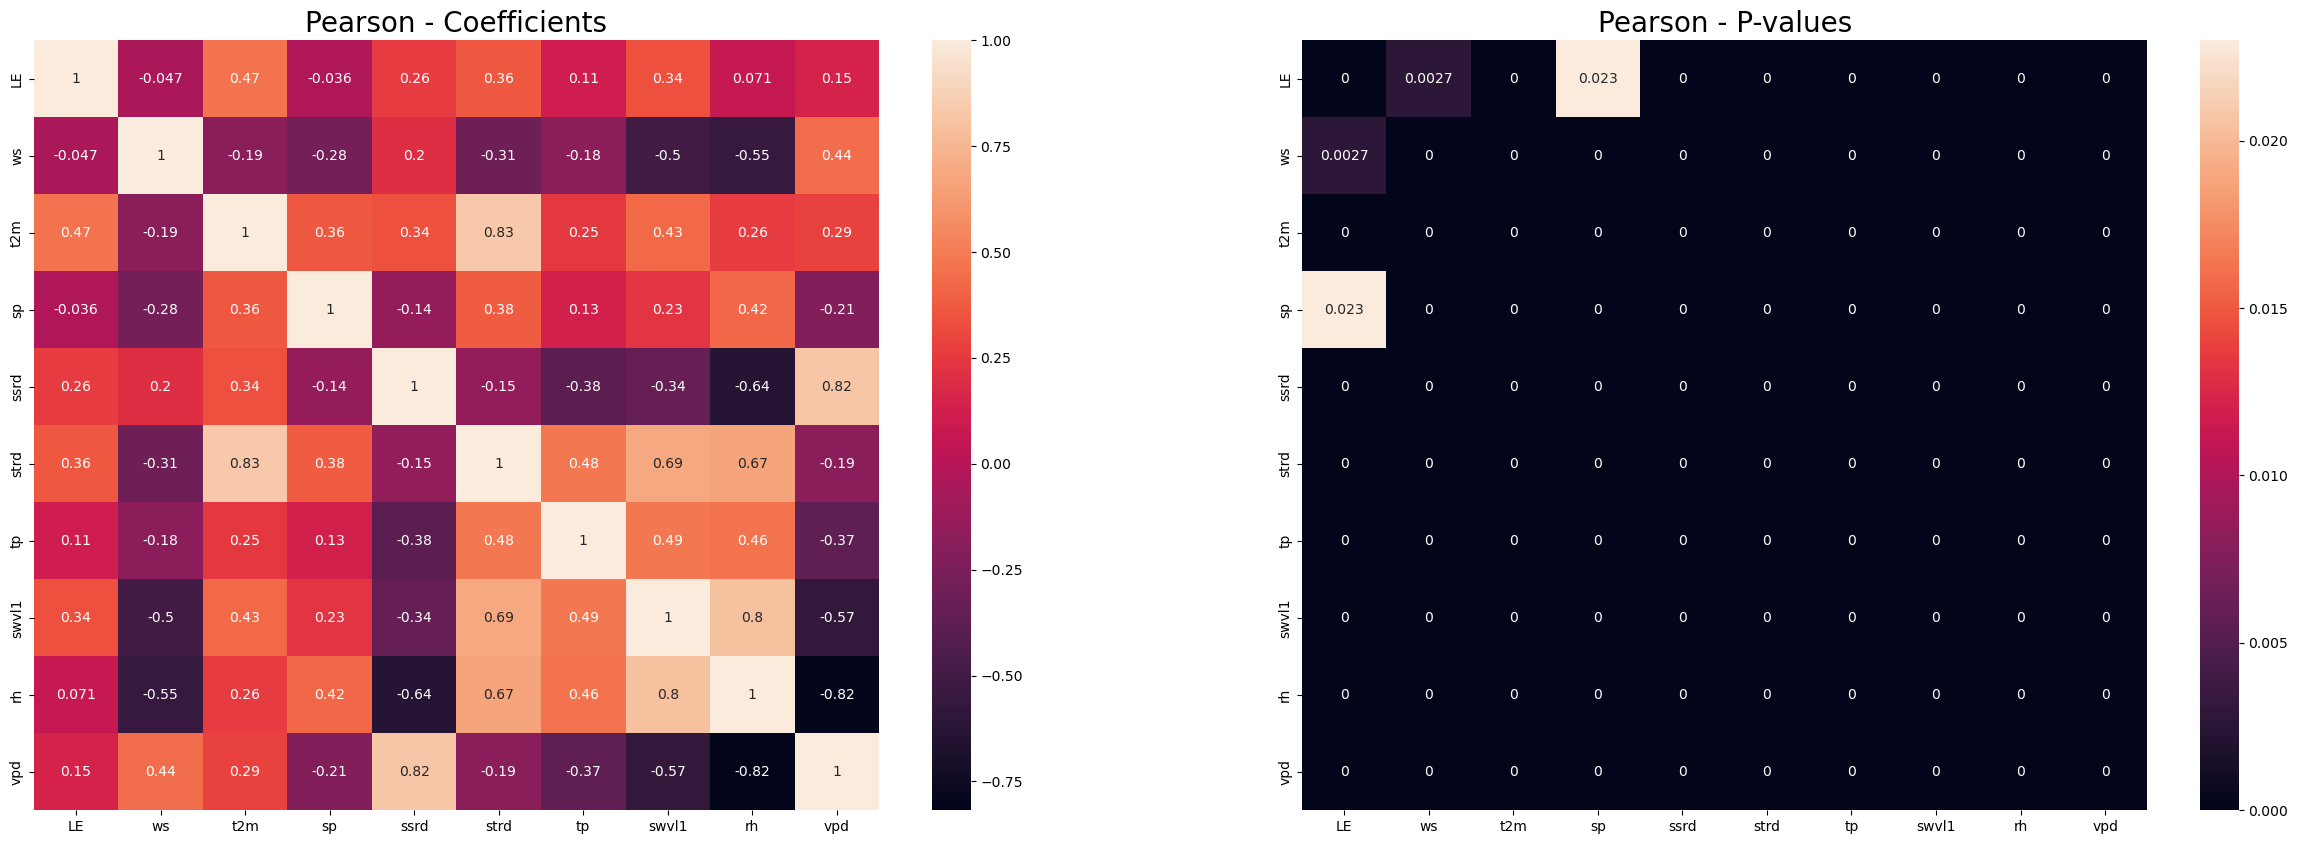

In [16]:
from scipy.stats import pearsonr, spearmanr
from scipy import stats
DF = train_df.iloc[:, 1:-4]
def correlation_test(df):
    pearson_stat = df.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
    pearson_p = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1])
    spearman_stat = df.corr(method=lambda x, y: stats.spearmanr(x, y)[0])
    spearman_p = df.corr(method=lambda x, y: stats.spearmanr(x, y)[1])

    pearson_p = (pearson_p - np.eye(df.shape[1])).round(4)
    spearman_p = (spearman_p - np.eye(df.shape[1])).round(4)

    return pearson_stat, pearson_p, spearman_stat, spearman_p
def save_correlation_map(stat, p_values, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
    sns.heatmap(stat, annot=True, ax=axes[0])
    sns.heatmap(p_values, annot=True, ax=axes[1])
    axes[0].set_title(title + ' - Coefficients', fontsize=20)
    axes[1].set_title(title + ' - P-values', fontsize=20)
    #plt.savefig(save_name, dpi=300, bbox_inches='tight')
pearson_stat, pearson_p, spearman_stat, spearman_p = correlation_test(DF)
save_correlation_map(pearson_stat, pearson_p, 'Pearson')

In [17]:
import statsmodels.api as sma
X = train_df.iloc[:, 2:-4]
y = train_df['LE']
X2  = sma.add_constant(X)
est = sma.OLS(y, X2)
est2 = est.fit()
p_values = est2.summary2().tables[1]['P>|t|']
np.round(p_values,6)

const    0.000000
ws       0.000000
t2m      0.000000
sp       0.000000
ssrd     0.000000
strd     0.371931
tp       0.001388
swvl1    0.000000
rh       0.000000
vpd      0.000000
Name: P>|t|, dtype: float64

In [18]:
from scipy import stats
p_value = []
for col in X.columns:
    p_value.append(stats.ttest_ind(train_df['LE'],train_df[col])[-1])
    print(f"p value for {str(col)} : {stats.ttest_ind(train_df['LE'],train_df[col])[-1]}")
    #print(f'p value for{str(col)}:{stats.ttest_ind(train_df['LE'],train_df['ws'])}')
d = pd.DataFrame({'features':X.columns, 'p value':p_value})
#d.to_csv('F:\\pvalues.csv')
d

p value for ws : 0.0
p value for t2m : 0.0
p value for sp : 0.0
p value for ssrd : 0.0
p value for strd : 0.0
p value for tp : 0.0
p value for swvl1 : 0.0
p value for rh : 8.830954518473826e-140
p value for vpd : 0.0


features        p value
0       ws   0.000000e+00
1      t2m   0.000000e+00
2       sp   0.000000e+00
3     ssrd   0.000000e+00
4     strd   0.000000e+00
5       tp   0.000000e+00
6    swvl1   0.000000e+00
7       rh  8.830955e-140
8      vpd   0.000000e+00

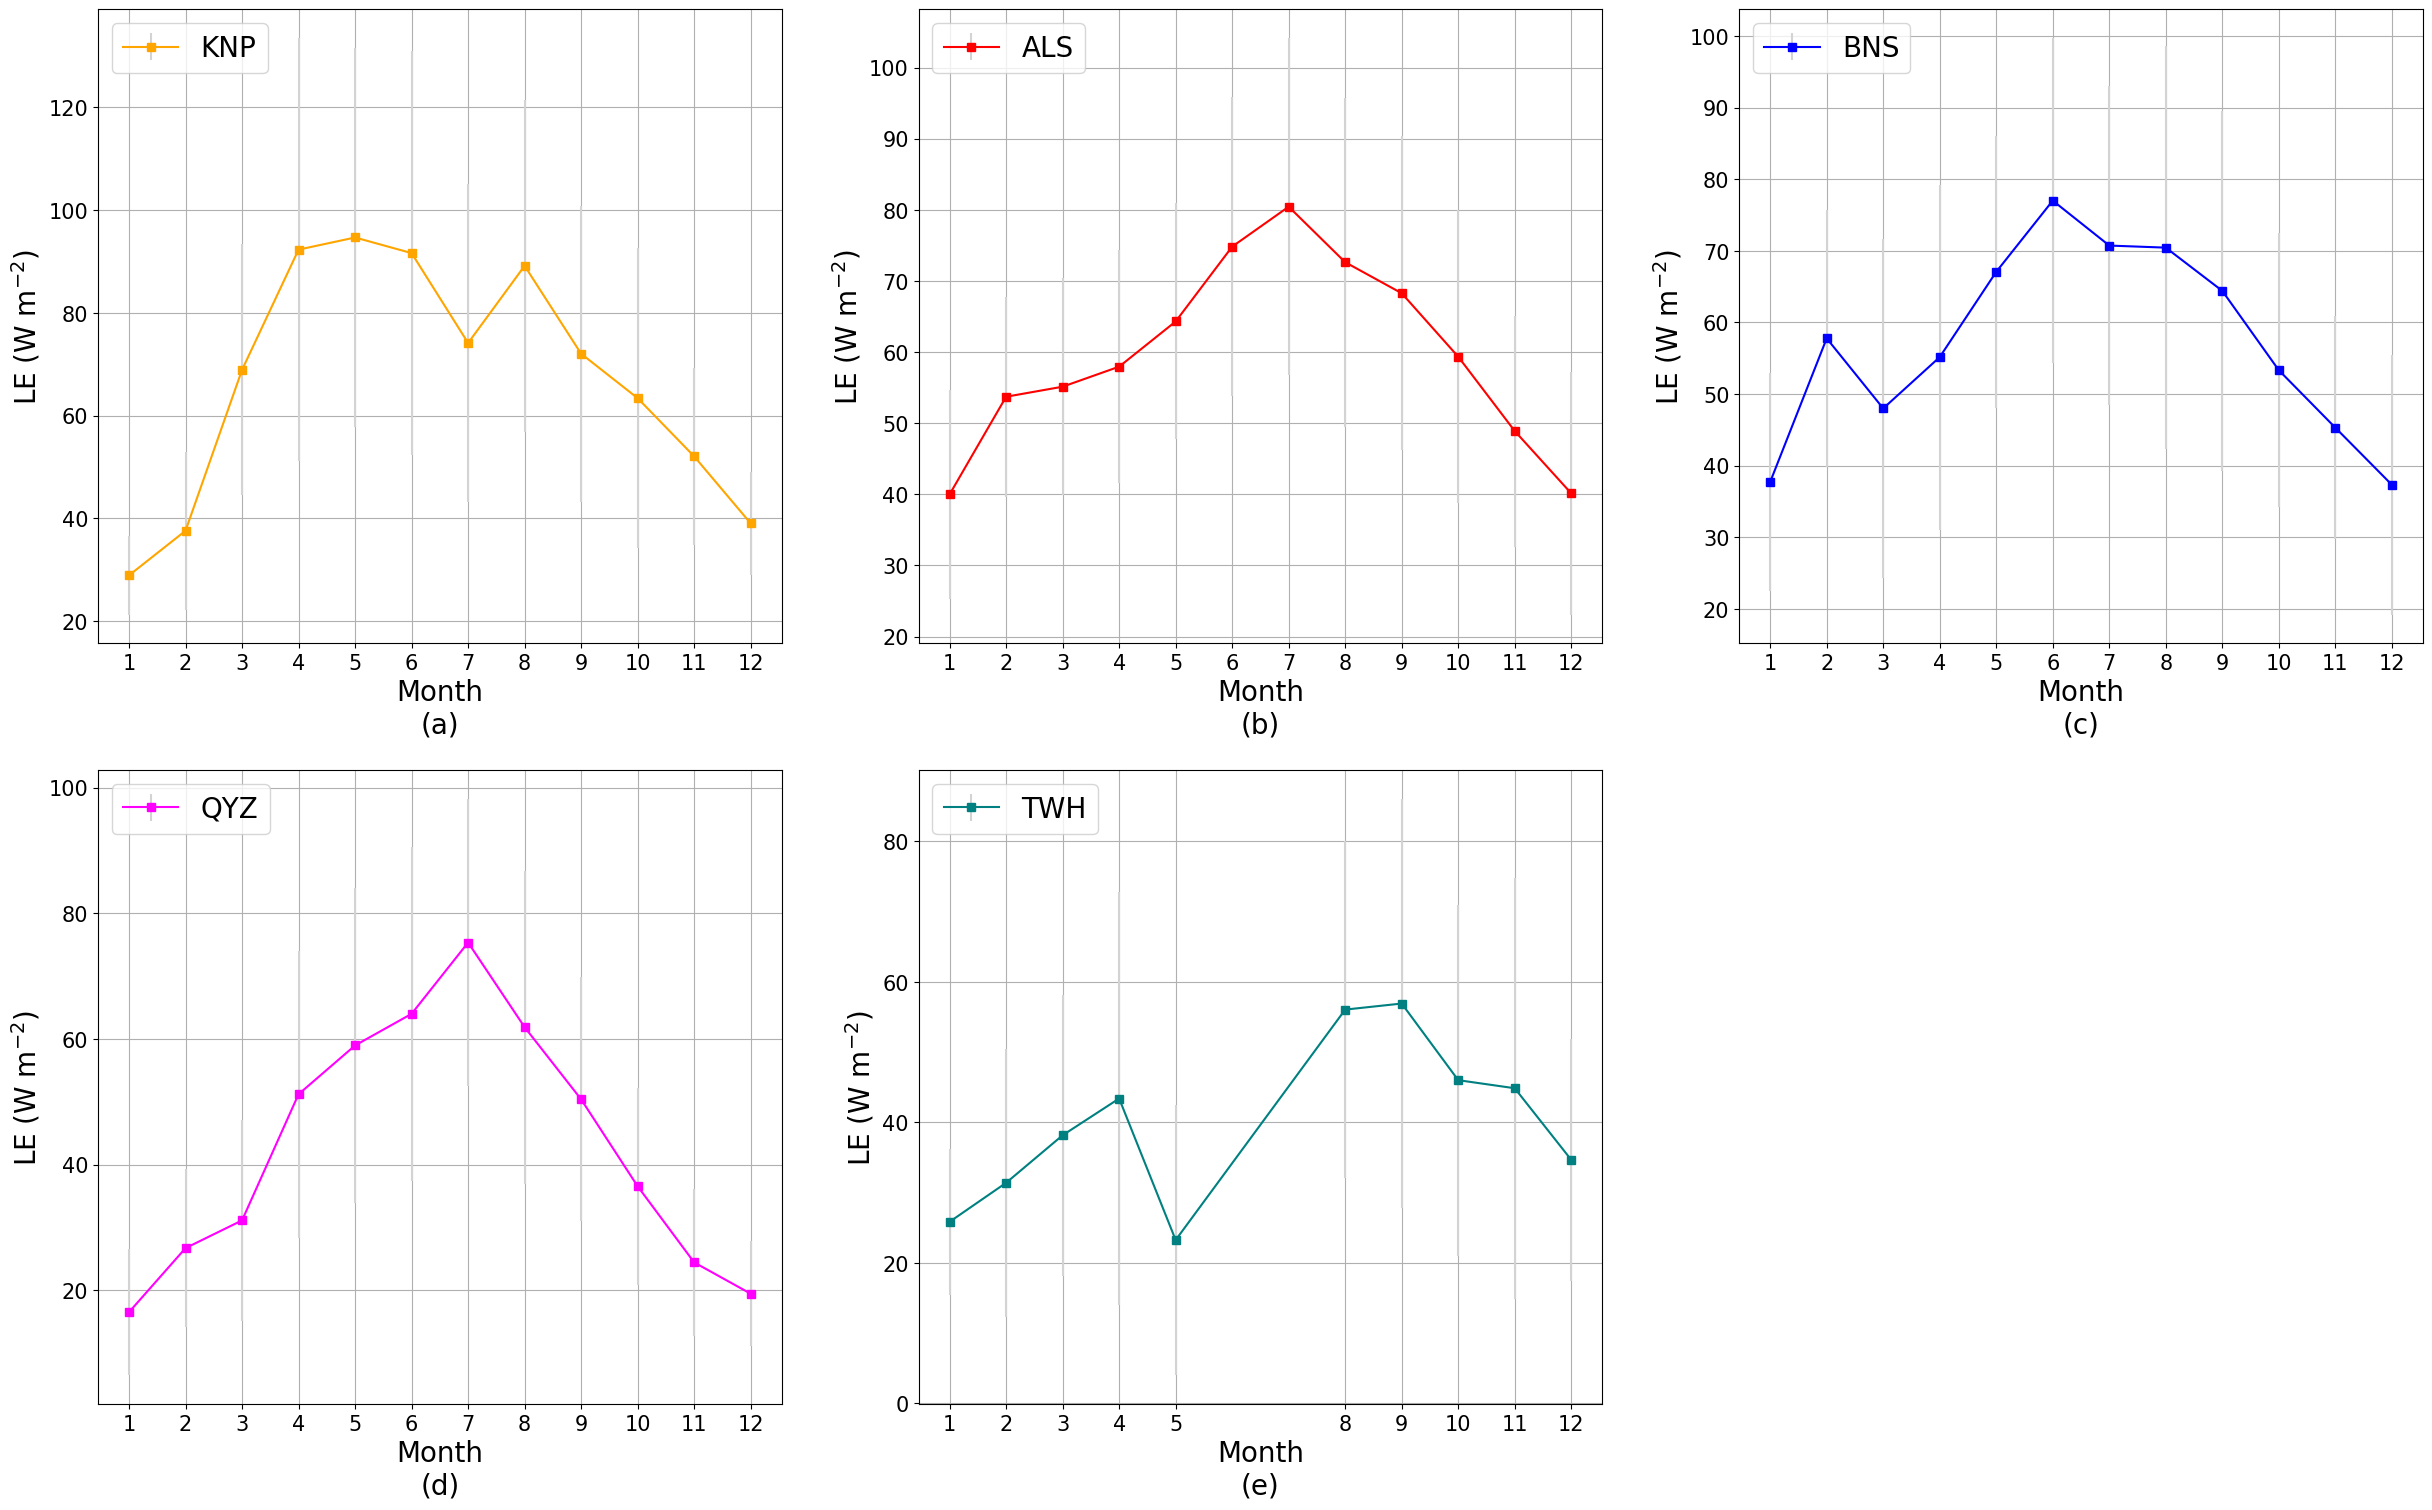

In [19]:
means, stds = [], []
for df in dfs:
    means.append([df[df['month'] == i]['LE'].mean() for i in df['month'].unique()])
    stds.append([df[df['month'] == i]['LE'].std() for i in df['month'].unique()])
month = []    
for df in dfs:
    month.append([i for i in sorted(df['month'].unique())])
    
plt.figure(figsize = (30,28))
col = ['red', 'blue', 'green', 'orange', 'magenta','teal','lime'] #ecolor='lightgray',
sites = ['ALS', 'BNS', 'CLM', 'KNP', 'QYZ', 'TWH']
no = ['(a)','(b)','(c)','(d)','(e)','(f)']
index = [3,0,1,4,5]
for i in index:
    plt.subplot(3,3,index.index(i)+1)
#     plt.title(sites[i], fontsize = 18)
    plt.errorbar([*month[i]], means[i], stds[i],marker = 's',ecolor='lightgray',
                  c = col[i], label = sites[i])
    plt.xlabel('Month\n'+no[index.index(i)], fontsize = 20)
    plt.xticks([*month[i]], fontsize = 20)
    #plt.xlim(1,12)
    plt.ylabel('LE (W m$^{-2}$)', fontsize = 20)
    plt.grid(True)
    plt.legend(fontsize = 20, loc = 'upper left')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
plt.savefig('plots/all sites monthly trend.png', dpi = 600)

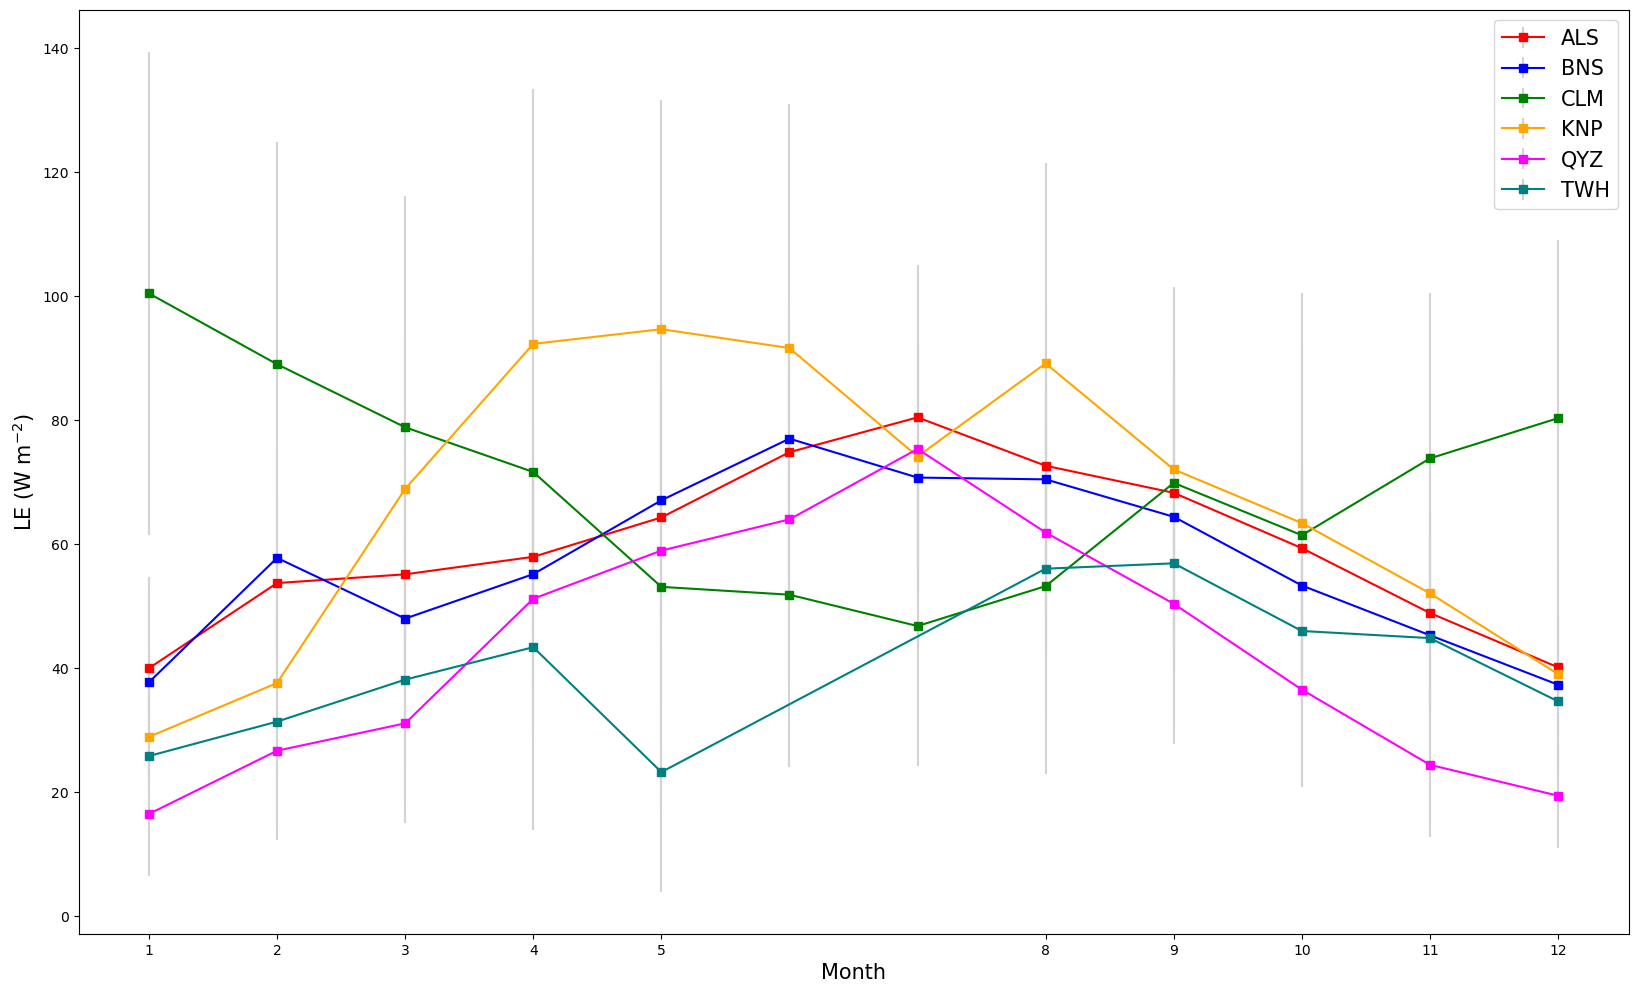

In [20]:
plt.figure(figsize = (20,12))
for i in range(6):
    plt.errorbar([*month[i]], means[i], stds[i],marker = 's',ecolor='lightgray',
                  c = col[i], label = sites[i])
    plt.legend(fontsize = 15)
    plt.xlabel('Month', fontsize = 15)
    plt.xticks([*month[i]])
    #plt.xlim(1,12)
    plt.ylabel('LE (W m$^{-2}$)', fontsize = 15)

In [21]:
px.box(train_df, x = 'month', y = 'LE', color = 'site')

In [22]:
train_df.columns

Index(['date', 'LE', 'ws', 't2m', 'sp', 'ssrd', 'strd', 'tp', 'swvl1', 'rh',
       'vpd', 'site', 'year', 'month', 'doy'],
      dtype='object')

In [23]:
#selected_features = ['ws', 't2m', 'strd', 'tp', 'swvl1', 'rh', 'sp']
selected_features = ['ws','t2m', 'ssrd', 'strd', 'tp', 'swvl1','rh', 'vpd', 'sp']
pt_le = PowerTransformer(method = 'yeo-johnson', standardize = True, copy = True)
#qt = preprocessing.QuantileTransformer(random_state=0)
x = train_df[selected_features]
y = train_df['LE'].values
y = pt_le.fit_transform(y.reshape(-1,1))[:,0]
#y = train_df['LE']
px.line(train_df, x = 'doy', y = 'LE', color = 'site', markers = True)

In [24]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components = 0.99)
x_reduced = pca.fit_transform(x)
x_reduced

array([[ -70.56818133,   79.57835954,   54.69531384],
       [-100.97062392,   45.30203553,   72.63780088],
       [-103.97452844,   43.7568819 ,   72.72650651],
       ...,
       [  -4.86486823,   -1.23583247,   21.36039864],
       [ -26.20348506,  -27.18676174,   25.26866709],
       [   9.0877823 ,   14.09104874,    9.05227804]])

In [19]:
pca.explained_variance_ratio_

array([0.49889784, 0.34180608, 0.15351764])

In [20]:
d = pd.DataFrame(x_reduced, columns = ['pc1', 'pc2', 'pc3'])
d['LE'] = train_df['LE']
d

pc1        pc2        pc3         LE
0     -70.568181  79.578360  54.695314  23.567787
1    -100.970624  45.302036  72.637801  18.227945
2    -103.974528  43.756882  72.726507  27.914696
3    -106.126862  45.057163  69.021246  57.101536
4    -100.655298  45.957966  63.654713  37.987171
...          ...        ...        ...        ...
4068  -28.716068 -45.868718  -7.538112  32.336930
4069  -11.497564  -5.610006  25.456785  23.868916
4070   -4.864868  -1.235832  21.360399  36.753606
4071  -26.203485 -27.186762  25.268667  27.397726
4072    9.087782  14.091049   9.052278  20.987344

[4073 rows x 4 columns]

In [21]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.04)
x_red = kpca.fit_transform(x)
x_red

array([[-0.00296488, -0.00311944],
       [-0.0034212 , -0.00361301],
       [-0.00357776, -0.00378119],
       ...,
       [-0.00287653, -0.00302446],
       [-0.00285625, -0.00300268],
       [-0.00288469, -0.00303322]])

plt.figure(figsize = (20, 12))
plt.errorbar(np.arange(len(means[0])), means[0], stds[0], label = 'BNS')
plt.errorbar(np.arange(len(means[1])), means[1], stds[1], label = 'CLM')
plt.errorbar(np.arange(len(means[2])), means[2], stds[2], label = 'KNP')
plt.errorbar(np.arange(len(means[3])), means[3], stds[3], label = 'QYZ')
plt.errorbar(np.arange(len(means[4])), means[4], stds[4], label = 'TWH')
plt.legend()

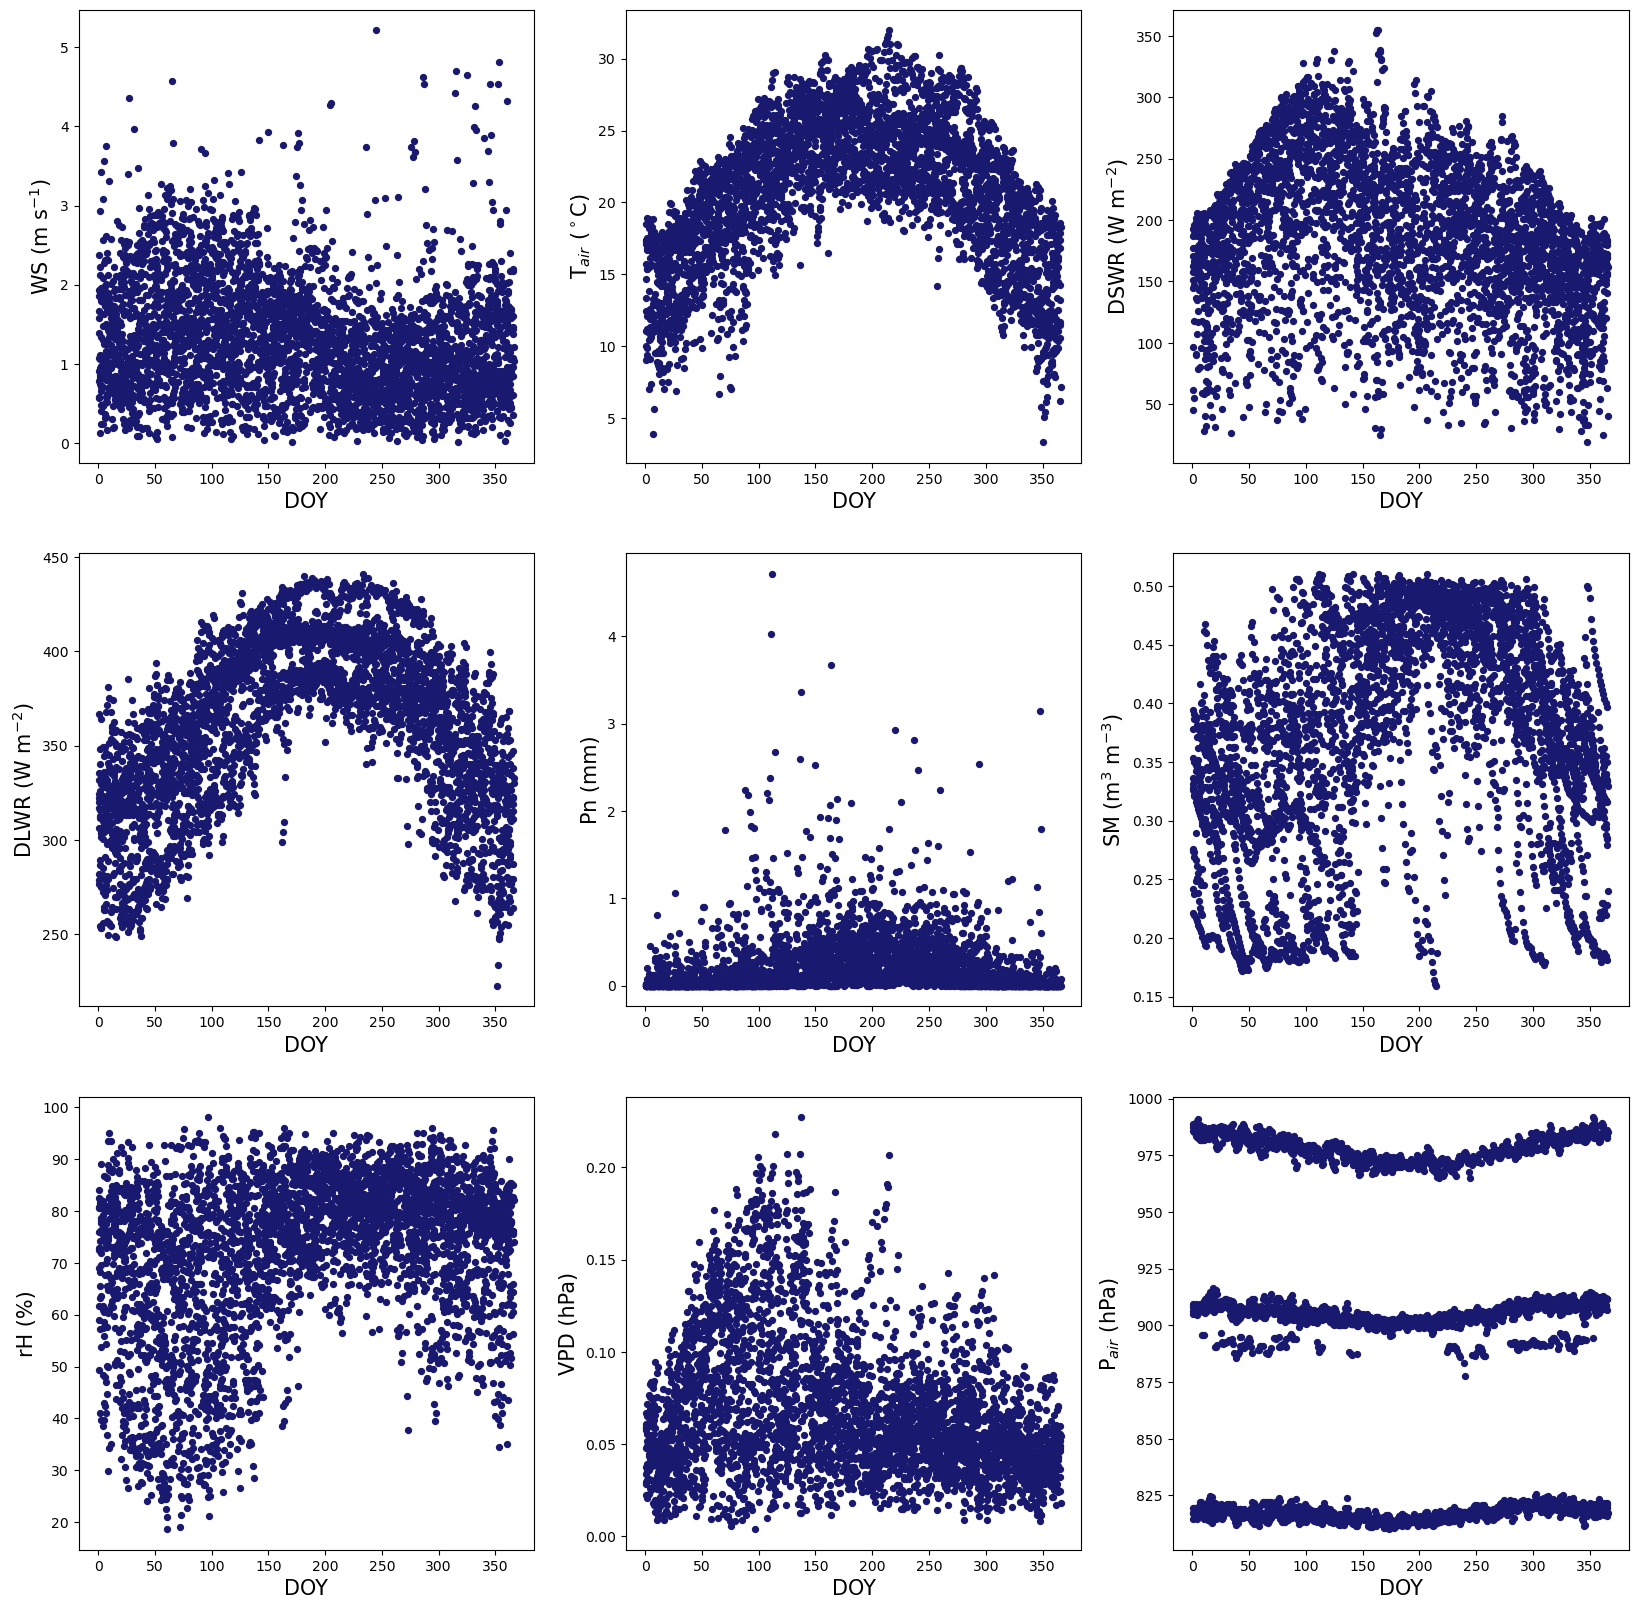

In [25]:
y_labels = ['WS (m s$^{-1}$)', 'T$_{air}$ ($^\circ$C)', 'DSWR (W m$^{-2}$)', 'DLWR (W m$^{-2}$)',
           'Pn (mm)', 'SM (m$^3$ m$^{-3}$)', 'rH (%)', 'VPD (hPa)', 'P$_{air}$ (hPa)']
plt.figure(figsize = (20,20))
for i in range(len(selected_features)):
    plt.subplot(3,3,i+1)
    plt.scatter(train_df['doy'], train_df[selected_features[i]], c = 'midnightblue', s = 18)
    #plt.title(selected_features[i], fontsize = 15)
    plt.xlabel('DOY', fontsize = 15)
    plt.ylabel(y_labels[i], fontsize = 15)
    
#train_df.plot(train_df, x = 'doy', y = col, kind = 'scatter')

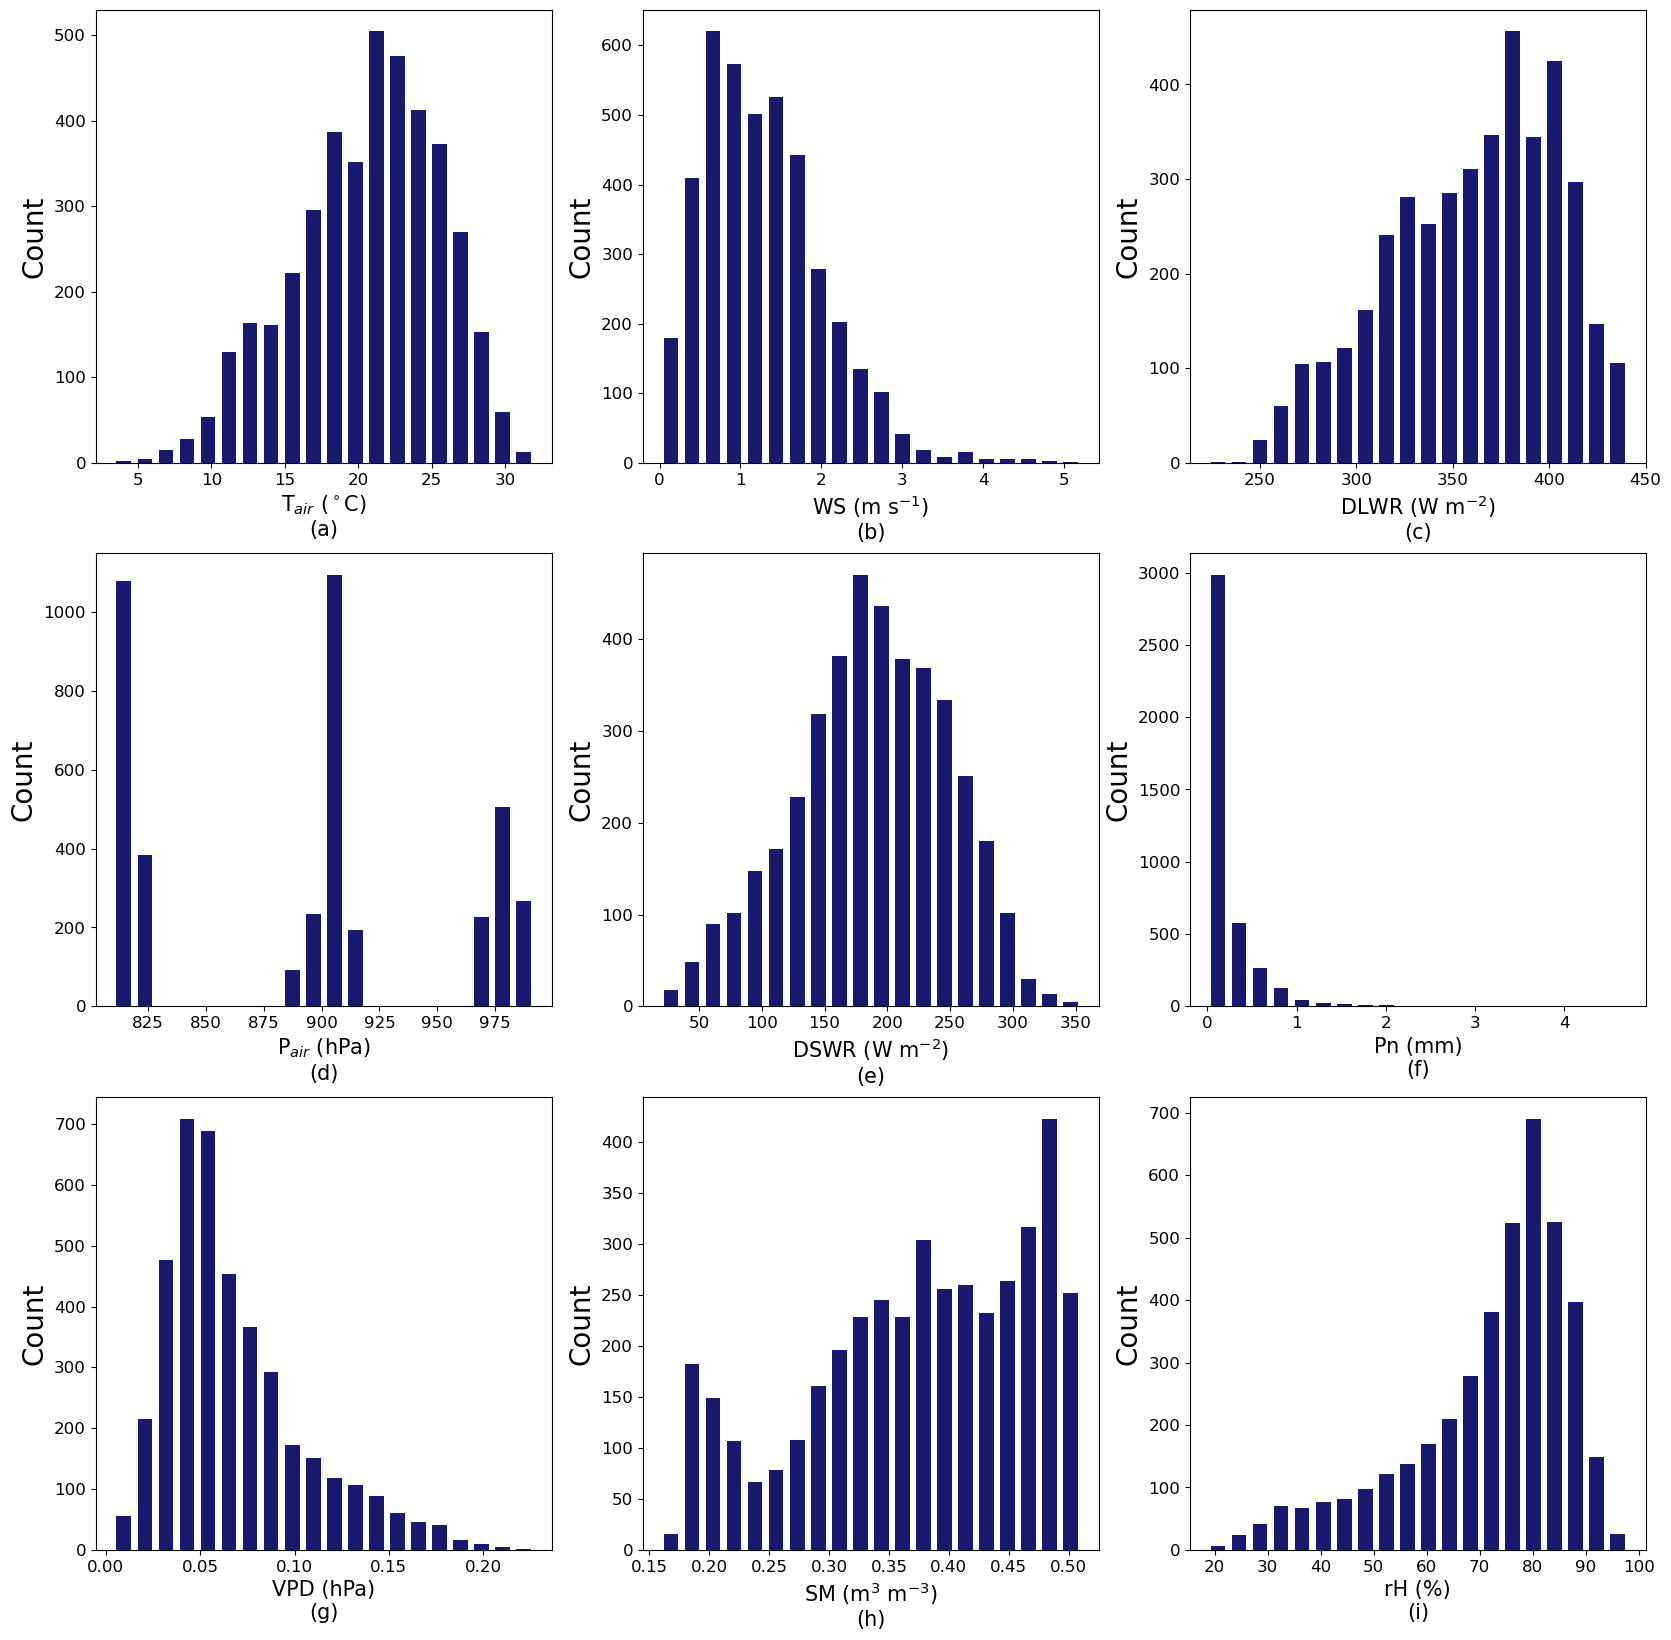

In [26]:
plt.figure(figsize = (20,20))
index = [1,0,3,8,2,4,7,5,6]
no = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
for i in index:
    plt.subplot(3,3,index.index(i)+1)
    plt.hist(train_df[selected_features[i]], bins = 20, rwidth = 0.7, color = 'midnightblue')
    #plt.title(selected_features[i], fontsize = 15)
    plt.xlabel(y_labels[i]+'\n'+no[index.index(i)], fontsize = 15)
    plt.ylabel('Count', fontsize = 20)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
plt.savefig('plots/hist_plot_all_ver.png', dpi = 600)

In [27]:
train_df

date         LE        ws        t2m          sp        ssrd  \
0    2010-01-01  23.567787  1.856722  11.077478  817.402031  151.269444   
1    2010-01-02  18.227945  1.059069   9.889856  819.559609  194.182760   
2    2010-01-03  27.914696  1.333110  10.445764  818.174453  196.901788   
3    2010-01-04  57.101536  2.086002  11.358636  814.464922  197.137309   
4    2010-01-05  37.987171  1.849963  11.851709  816.049062  193.983177   
...         ...        ...       ...        ...         ...         ...   
4068 2012-03-23  32.336930  0.728529  17.855219  890.499609  243.425712   
4069 2012-03-26  23.868916  0.739486  14.033868  895.262422  196.156233   
4070 2012-03-27  36.753606  0.597977  15.576593  896.402578  189.166024   
4071 2012-03-28  27.397726  0.576939  15.906793  895.421172  222.255972   
4072 2012-03-31  20.987344  0.889163  15.307184  894.019063  170.418247   

            strd        tp     swvl1         rh       vpd site  year  month  \
0     276.936528  0.000937  0.220904  49.275906  0.066950  ALS  2010      1   
1     254.326319  0.000000  0.219242  41.092042  0.071826  ALS  2010      1   
2     253.492830  0.000000  0.217382  39.636692  0.076390  ALS  2010      1   
3     256.057552  0.000000  0.214225  38.637492  0.082517  ALS  2010      1   
4     262.859149  0.000000  0.210761  39.690878  0.083789  ALS  2010      1   
...          ...       ...       ...        ...       ...  ...   ...    ...   
4068  361.627361  0.356259  0.354903  77.639895  0.045746  TWH  2012      3   
4069  334.180313  0.065141  0.366606  69.870282  0.048286  TWH  2012      3   
4070  339.859410  0.051692  0.364530  70.095206  0.052938  TWH  2012      3   
4071  331.345382  0.067560  0.358928  69.044567  0.055968  TWH  2012      3   
4072  353.882500  0.109528  0.346378  75.390604  0.042817  TWH  2012      3   

      doy  
0       1  
1       2  
2       3  
3       4  
4       5  
...   ...  
4068   83  
4069   86  
4070   87  
4071   88  
4072   91  

[4073 rows x 15 columns]

In [28]:
train_df.rename(columns = {'ws':'WS','t2m':'T$_{air}$','sp':'P$_{air}$','ssrd':'DSWR','strd':'DLWR',
                          'tp':'Pn','swvl1':'SW','rh':'rH','vpd':'VPD'}, inplace = True)

/tmp/ipykernel_3829/2327126817.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



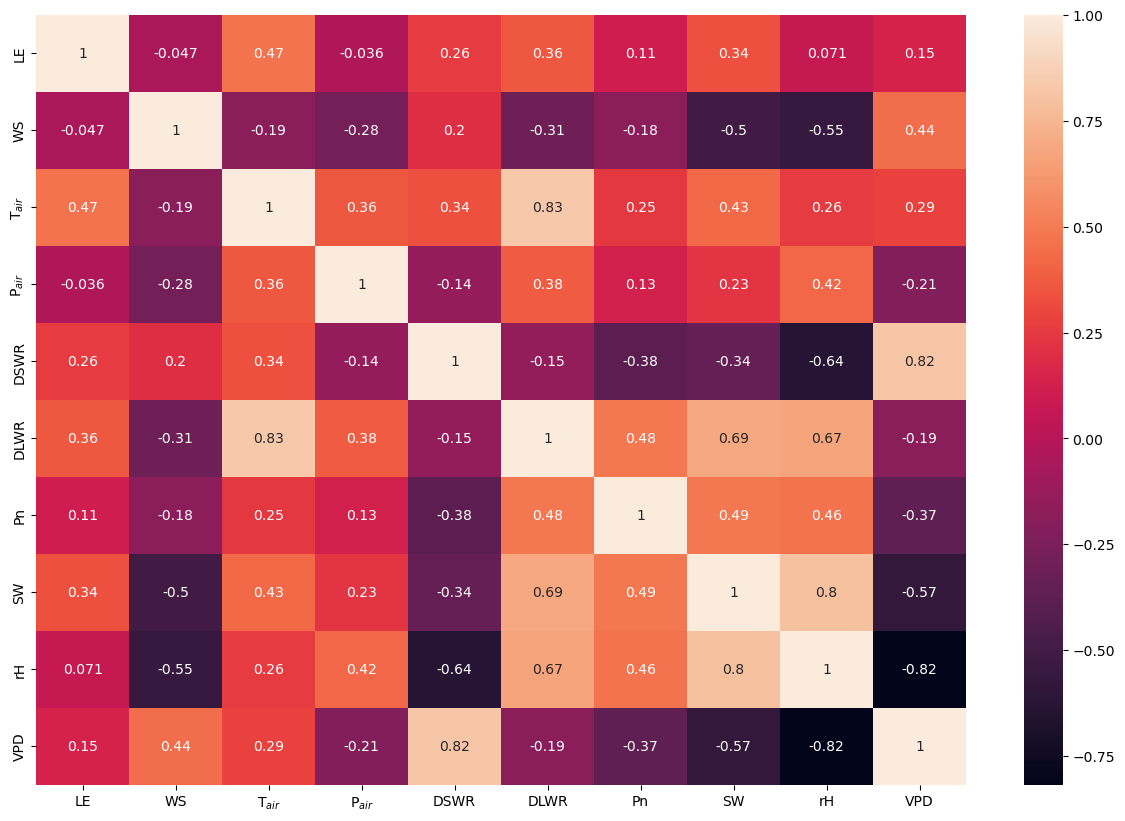

In [29]:
plt.figure(figsize = (15,10))
corr_matrix = train_df.iloc[:, 1:-3].corr()
sns.heatmap(corr_matrix, annot = True)
# plt.title('Correlation matrix on traning data', fontsize = 20)
plt.savefig('plots/corr_heatmap_ERA5.png', dpi = 600)
plt.show()

In [30]:
pt = PowerTransformer(method = 'yeo-johnson', standardize = True, copy = True)

def test_model(model_name, x_val, y_val):
    pred = model_name.predict(x_val)
    rmse = mean_squared_error(y_val, pred, squared = False)
    cross_validation_score = -cross_val_score(model_name, x_val, y_val,scoring = 'neg_root_mean_squared_error', cv = 4)
    r2score = r2_score(y_val, pred)
    print('val_rmse:', rmse)
    print('val_r2_score:', r2score)
    print('cross_val_score:',cross_validation_score.mean())

    plt.figure(figsize = (12,8))
    plt.scatter(np.arange(y_val.shape[0]), y_val, label = 'True LE')
    plt.scatter(np.arange(y_val.shape[0]), pred, label = 'prediced LE')
    plt.title('True LE and Predicted LE')
    plt.legend()
    plt.show()

def plot_importance(features, importance, model_name):
    importance_df = pd.DataFrame({
                              'features': features,
                              'importance': importance
                              }).sort_values(by = 'importance', ascending= False)
    plt.figure(figsize=(10,6))
    plt.title(str(model_name) + ' Feature Importance')
    sns.barplot(data=importance_df.head(10), x='importance', y='features')
    sns.despine();

    return
def adj_r2(no_of_features, true, predicted):
    r2 = r2_score(true, predicted)
    adj_r2 = 1 - ((1 - r2)*(len(true) - 1))/(len(true) - no_of_features - 1)
    return adj_r2

def error_distribution(y, p):
    errer = np.abs(y - p)
    plt.figure(figsize = (20,12))
    plt.subplot(3,1,1)
    plt.hist(y, bins = 120, rwidth = 0.8)
    plt.title('distribution of target variable')
    
    plt.subplot(3,1,2)
    plt.bar(y, np.abs(p - y))
    plt.title('disribution of error over target')
    
    plt.subplot(3,1,3)
    plt.hist(p - y, bins = 120, rwidth = 0.8)
    plt.title('distribution of error')
    return plt.show()

def error_analysis(true, predicted):
    plt.figure(figsize = (20,8))
    plt.subplot(1,2,1)
    plt.scatter(true,predicted)
    plt.plot(np.arange(int(min(true)),int(max(true))+1),np.arange(int(min(true)),int(max(true))+1),c='r')
    plt.grid(True)
    plt.xlabel('True LE')
    plt.ylabel('Predicted_LE')
    plt.subplot(1,2,2)
    plt.scatter(predicted,predicted - true)
    plt.plot(predicted,predicted - predicted, c='r')
    plt.grid(True)
    plt.xlabel('Predicted_LE')
    plt.ylabel('Residuals')
    plt.show()
    
def error_distribution(y, p):
    errer = np.abs(y - p)
    plt.figure(figsize = (20,12))
    #plt.subplot(3,1,1)
    #plt.hist(y, bins = 120, rwidth = 0.8)
    #plt.title('distribution of target variable')

    plt.subplot(2,1,2)
    plt.hist(np.abs(p - y), bins = 120, rwidth = 0.8)
    plt.title('distribution of error')
    
    plt.subplot(2,1,1)
    plt.bar(y, np.abs(p - y),width = 0.1)
    plt.title('disribution of error over target')
    plt.show()

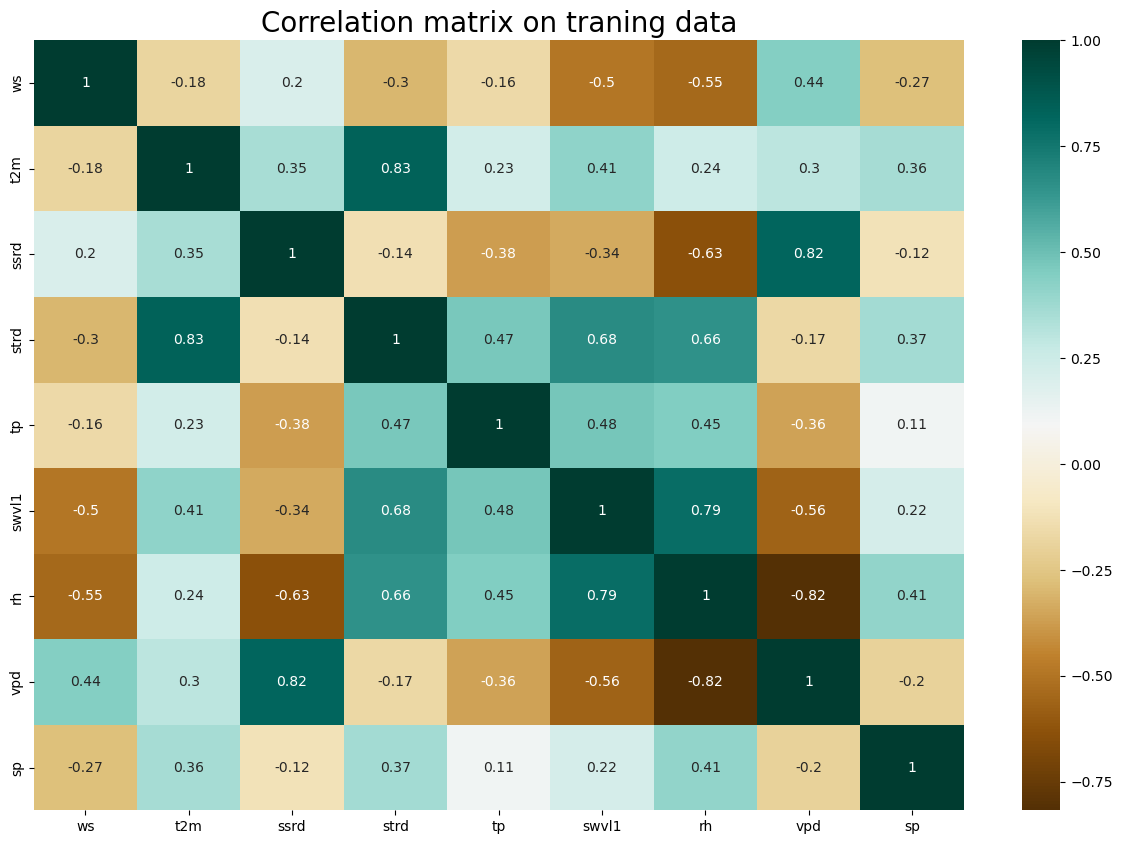

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size  = 0.3, random_state = 42)
plt.figure(figsize = (15,10))
corr_matrix = x_train.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'BrBG')
plt.title('Correlation matrix on traning data', fontsize = 20)
#plt.savefig('F:\graph\AI model for g_data\corr_heatmap')
plt.show()

In [32]:
px.scatter(train_df, x = 'date', y = 'LE', color = 'site')

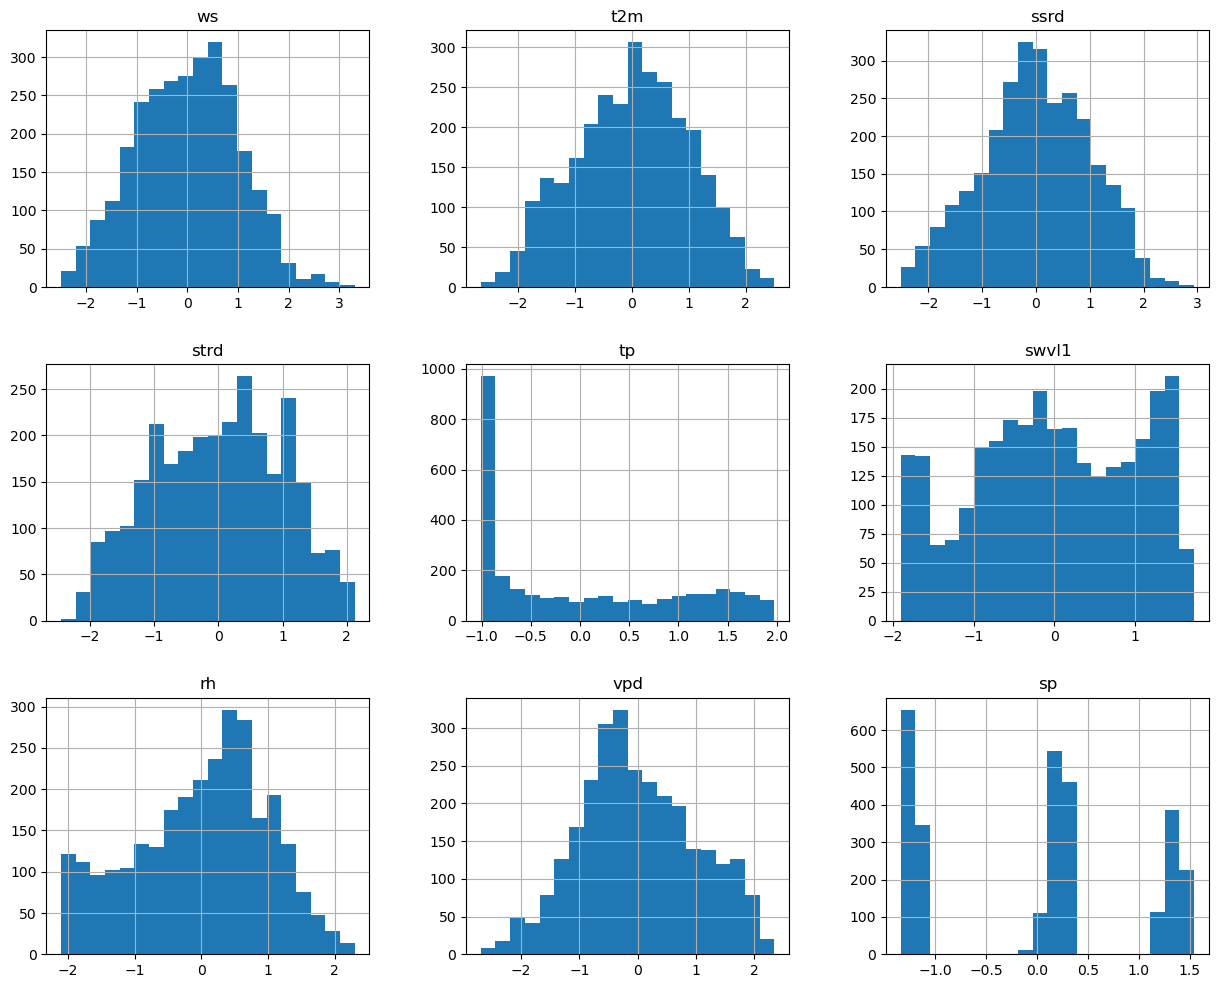

In [30]:
d = pd.DataFrame(pt.fit_transform(x_train), columns = x_train.columns)
d.hist(bins = 20, figsize = (15,12))
plt.show()

In [31]:
x_train.columns

Index(['ws', 't2m', 'ssrd', 'strd', 'tp', 'swvl1', 'rh', 'vpd', 'sp'], dtype='object')

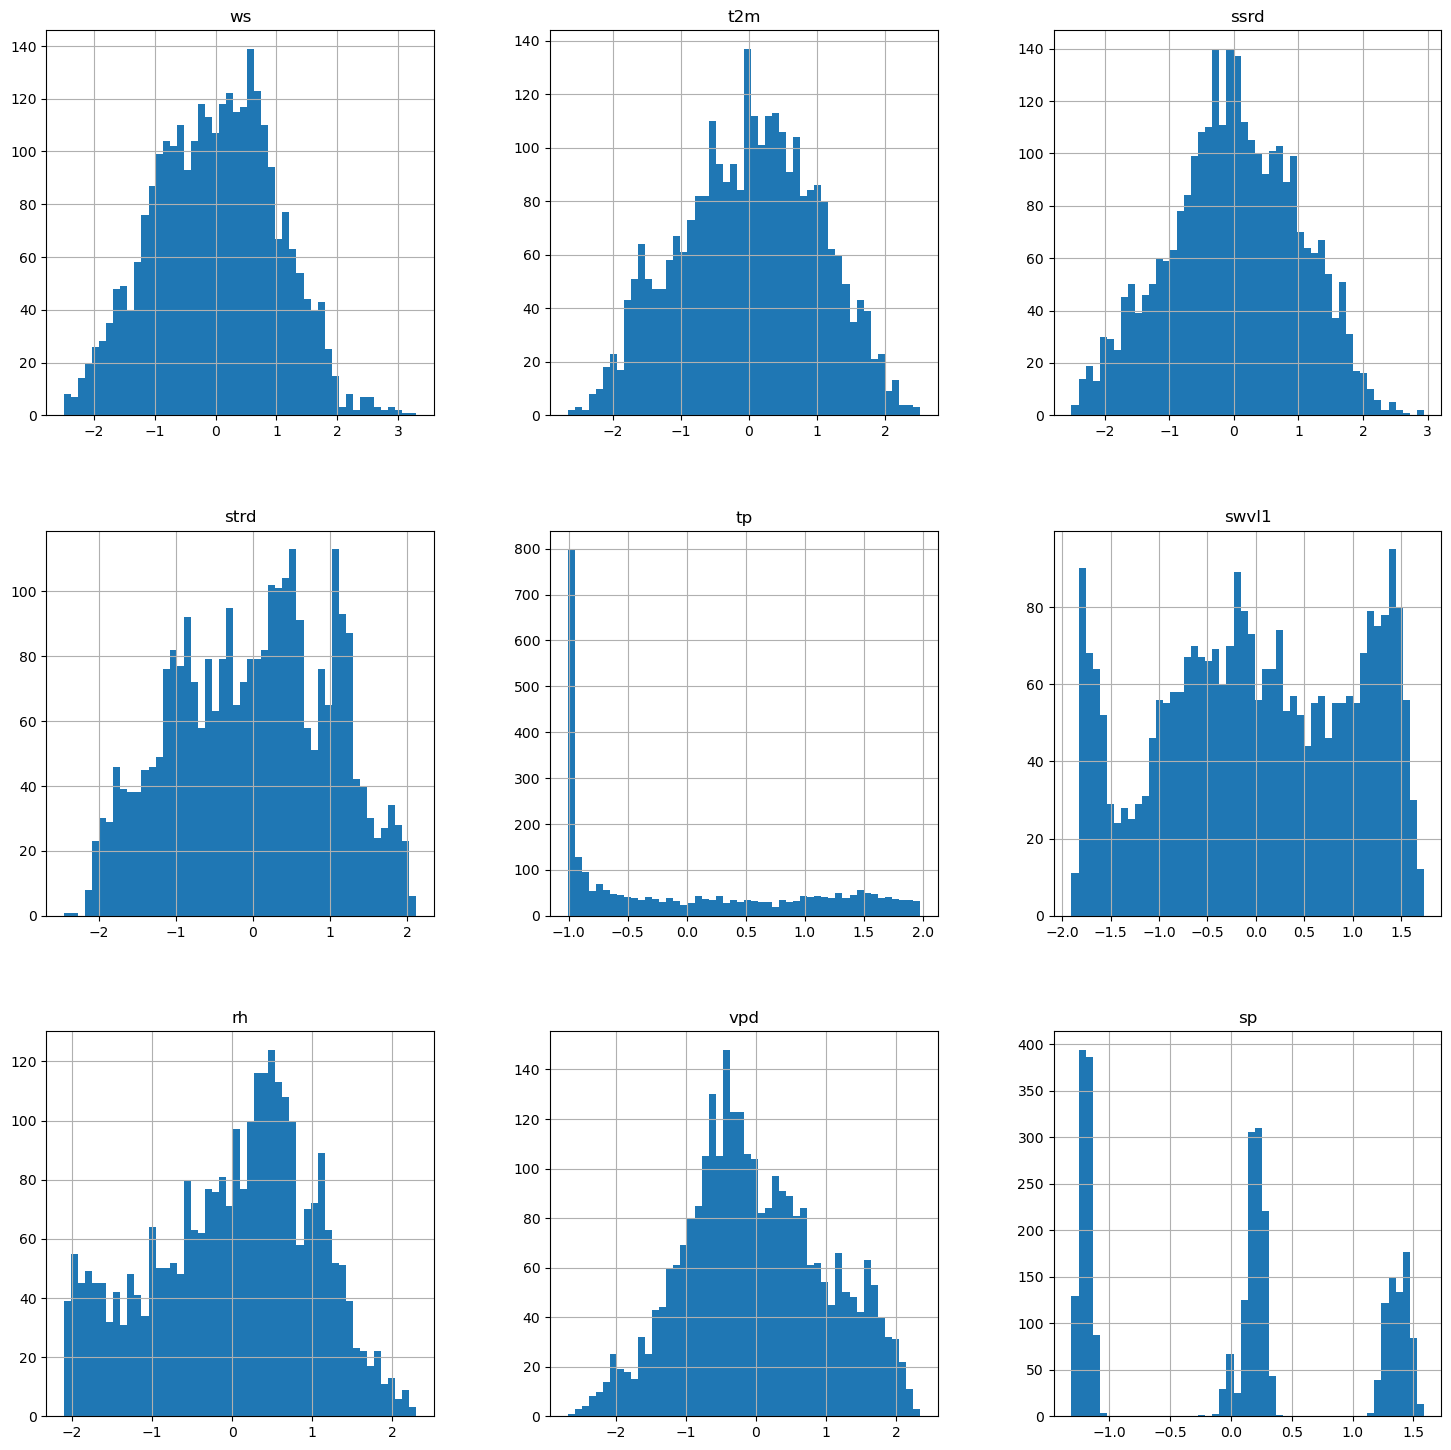

In [34]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
scaler_pipeline = make_pipeline(SimpleImputer(strategy = 'median'),
                                StandardScaler())
pt_pipeline = make_pipeline(SimpleImputer(strategy = 'median'),pt)
#preprocessing = make_column_transformer((pt,['ws', 't2m', 'ssrd', 'strd', 'swvl1', 'vpd']),
                                       #remainder = scaler_pipeline)
preprocessing = make_column_transformer((pt_pipeline,['ws', 't2m', 'ssrd', 'strd', 'tp', 'swvl1', 'rh', 'vpd']),
                                       remainder = scaler_pipeline)
#preprocessing = pt
processed_data = preprocessing.fit_transform(x_train)
processed_df = pd.DataFrame(processed_data, columns = x_train.columns, index = x_train.index)
#processed_df = pd.DataFrame(processed_data, columns = ['ws', 't2m', 'ssrd', 'strd', 'swvl1', 'vpd'], index = x_train.index)
processed_df.hist(bins = 50, figsize = (18,18))
plt.show()

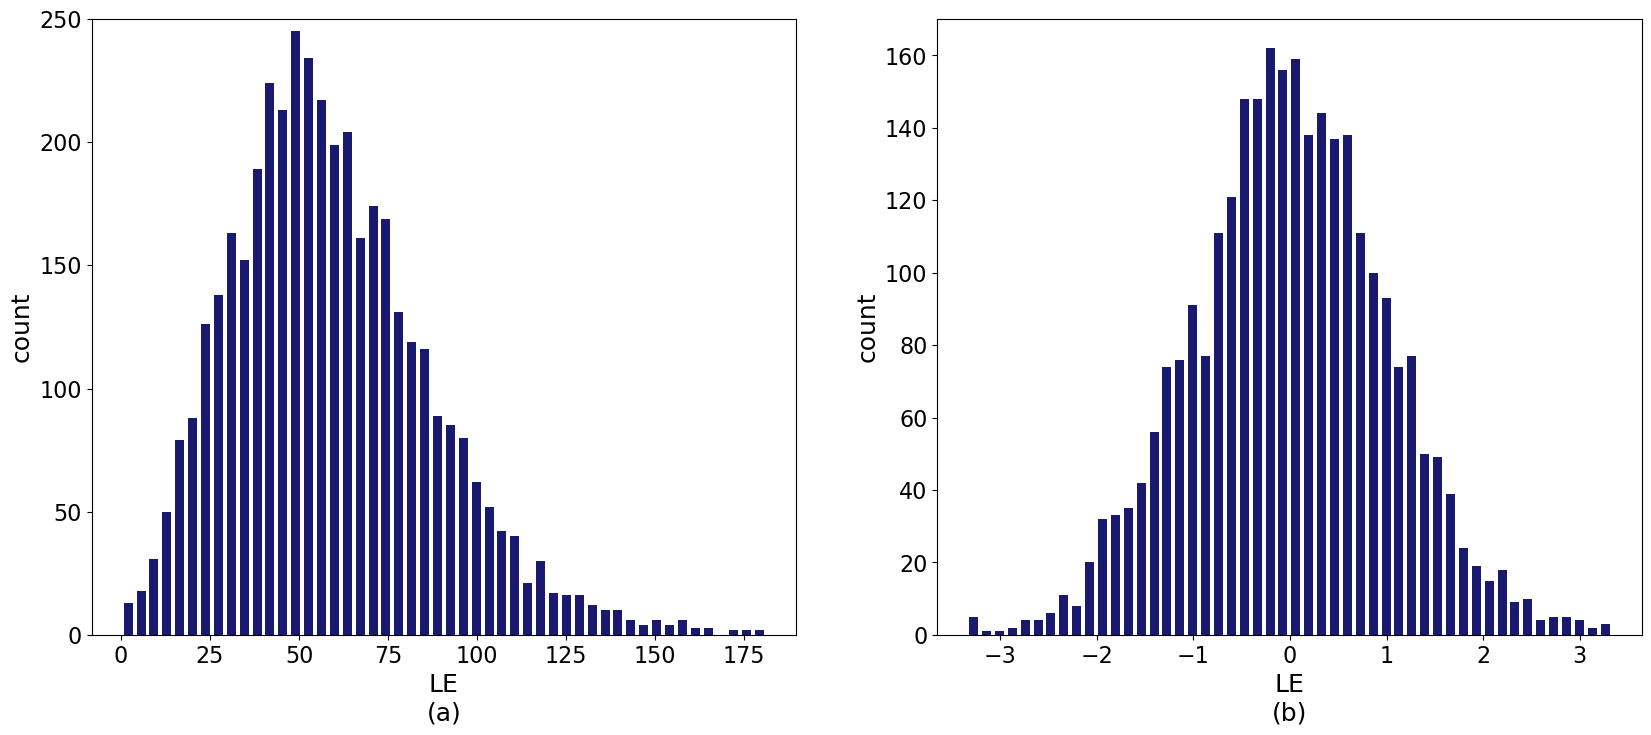

In [36]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.hist(train_df['LE'], bins = 50, color = 'midnightblue', rwidth = 0.7)
plt.ylabel('count', fontsize = 18)
plt.xlabel('LE\n(a)', fontsize = 18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylim(0,250)
#plt.savefig('F:\\m.tech thesis\\before pt.png', dpi = 300)
plt.subplot(1,2,2)
#plt.figure(figsize = (12,8))
plt.hist(y_train, bins = 50, rwidth = 0.7, color = 'midnightblue')
plt.ylabel('count',fontsize = 18)
plt.xlabel('LE\n(b)',fontsize = 18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# plt.ylim(0,250)
plt.savefig('plots/pt_on_LE2.png', dpi = 600)
plt.show()

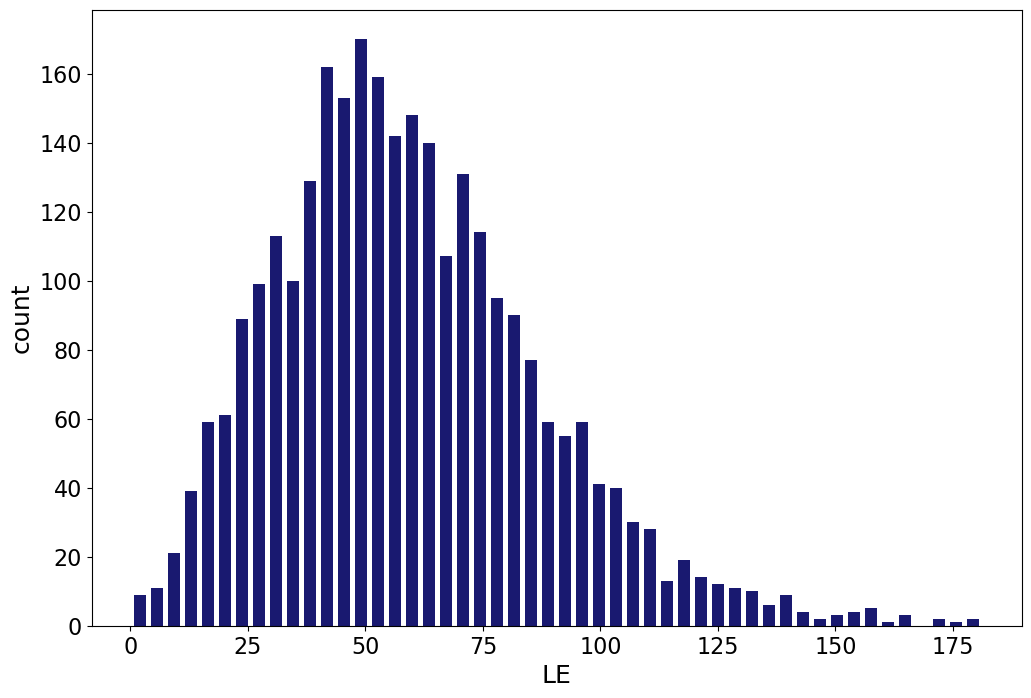

In [73]:
plt.figure(figsize = (12,8))
plt.hist(y_train, bins = 50, rwidth = 0.7, color = 'midnightblue')
plt.ylabel('count',fontsize = 18)
plt.xlabel('LE',fontsize = 18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#plt.savefig('F:\\m.tech thesis\\after pt.png', dpi = 300)
plt.show()

y_train, y_val = y_train.values**(1/4), y_val.values**(1/4)

In [35]:
val_error = []
val_adj_r2 = []
model_errors = {}
model_adjr2s = {}

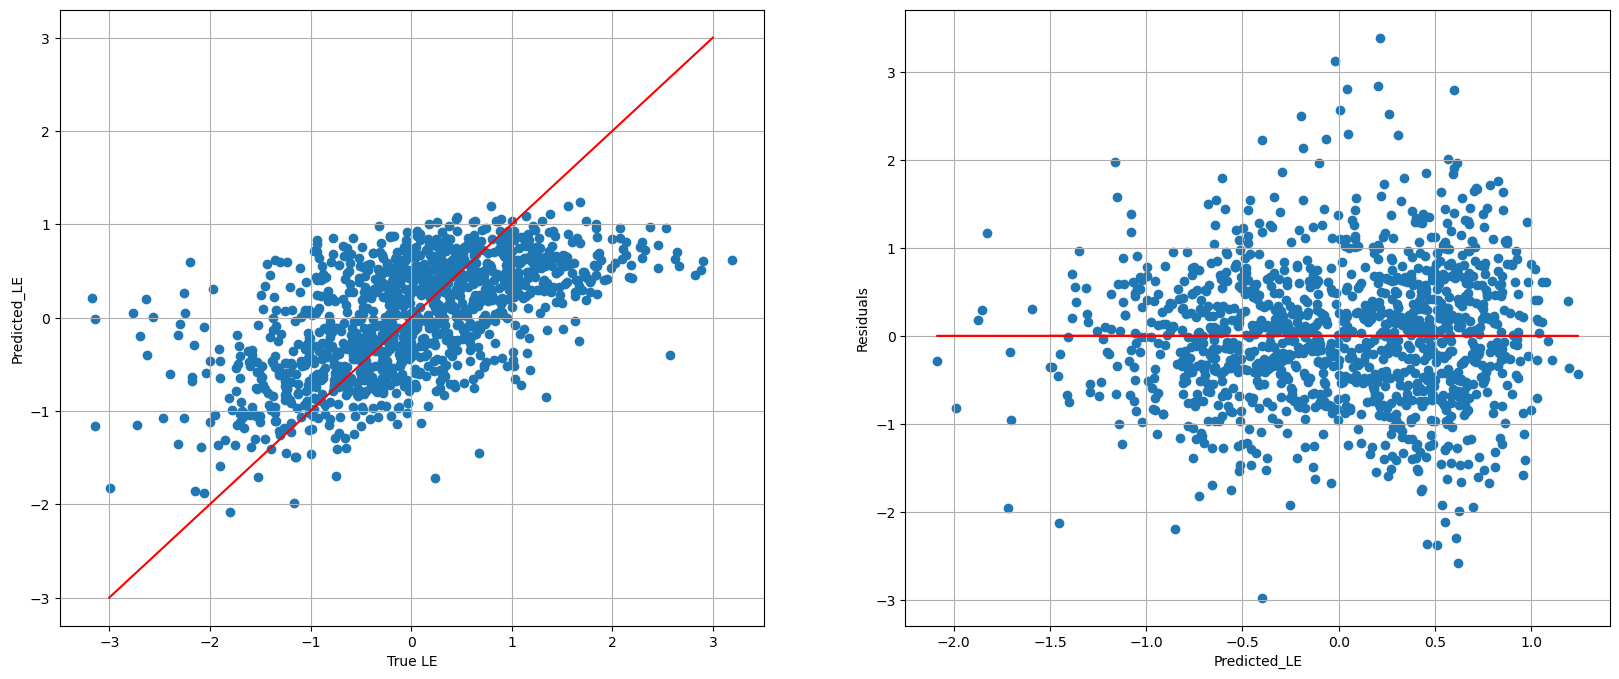

adj r2_score 0.336685169787607
test loss 0.7979178670275434


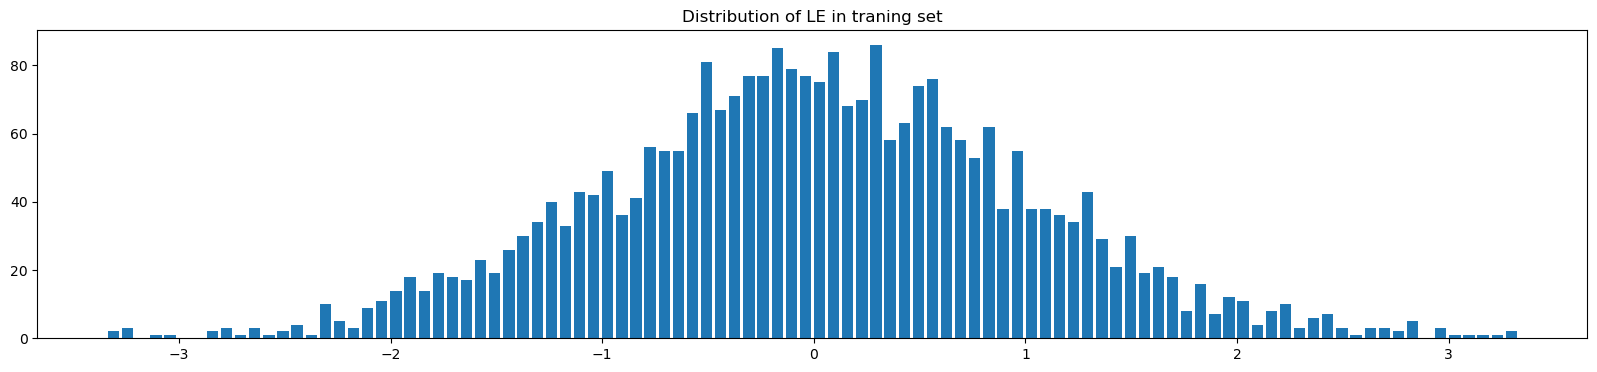

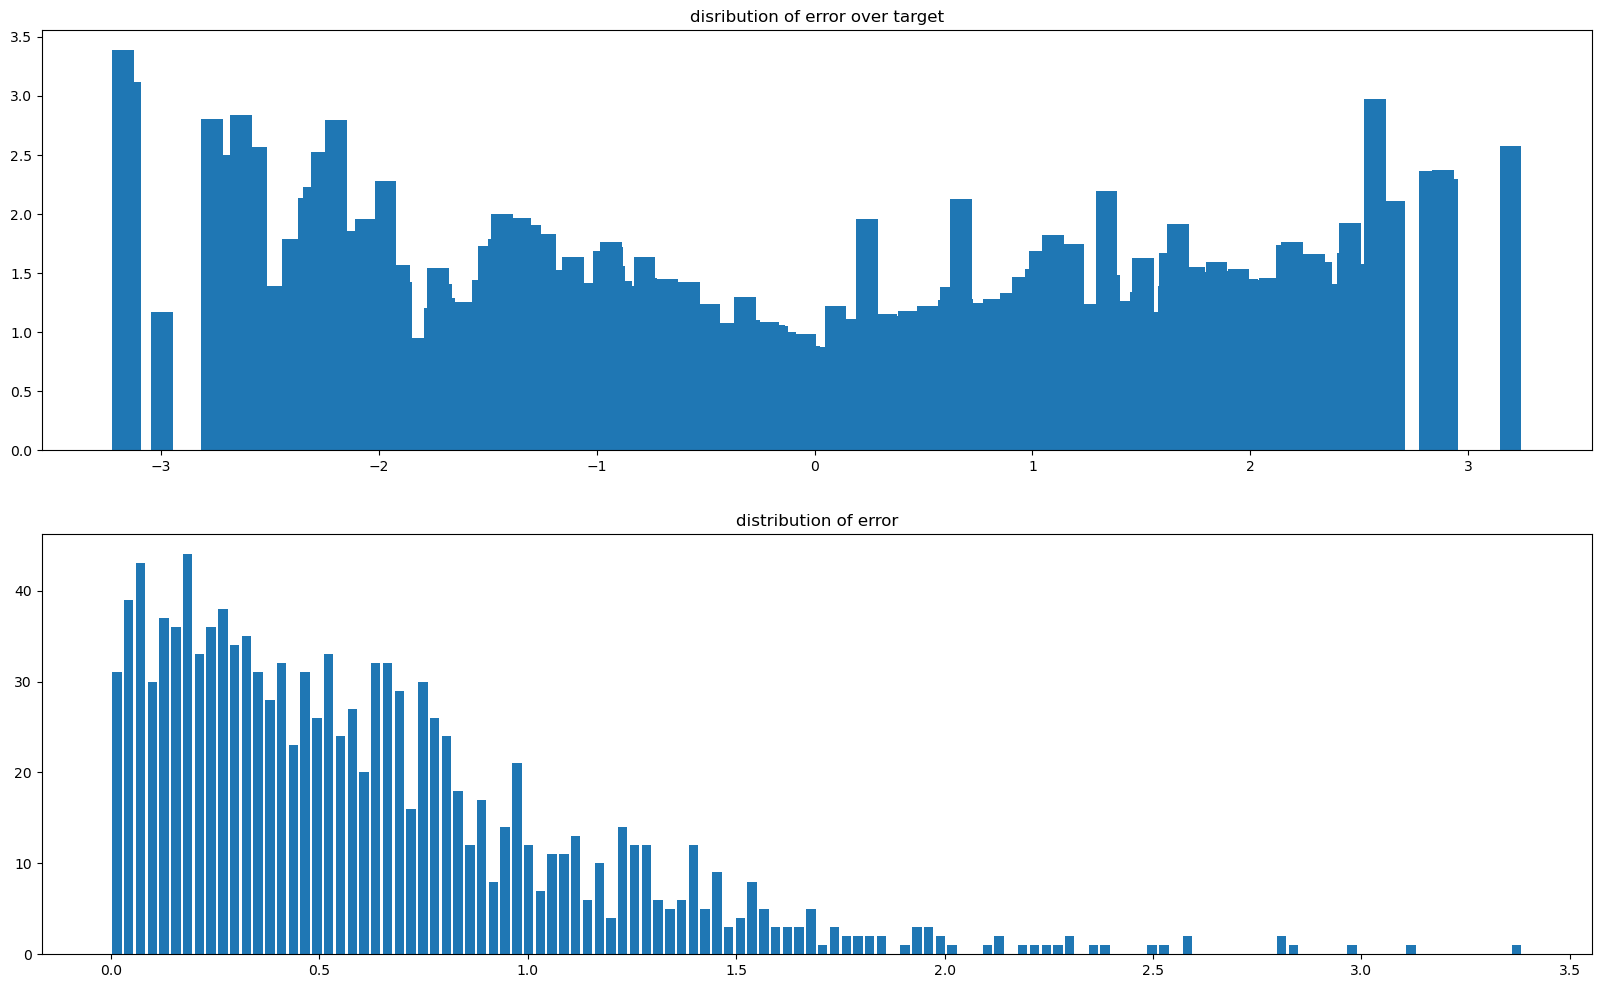

In [36]:
from sklearn.linear_model import LinearRegression,Lasso
lin_reg= make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(x_train,y_train)
#test_model(lin_reg, x_test, y_test)
error_analysis(y_val,lin_reg.predict(x_val))
print('adj r2_score',adj_r2(x_train.shape[1], y_val, lin_reg.predict(x_val)))
val_adj_r2.append(adj_r2(x_train.shape[1], y_val, lin_reg.predict(x_val)))
print('test loss',mean_squared_error(y_val, lin_reg.predict(x_val), squared = False))
val_error.append(mean_squared_error(y_val, lin_reg.predict(x_val), squared = False))
plt.figure(figsize=(20,4))
plt.hist(y_train, bins = 100, rwidth = 0.8)
plt.title('Distribution of LE in traning set')
plt.show()
error_distribution(y_val, lin_reg.predict(x_val))

lin_reg_errors = {}
svr_reg_errors = {}

rmse, adjr2 = {}, {}

error, r2 = {}, {}
fs = ['t2m', 'sp']
for i in range(len(fs)):
    e = fs.pop(i)
    X_train = x_train[fs]
    X_val = x_val[fs]
    preprocessing = make_column_transformer((pt_pipeline,fs),
                                           remainder = scaler_pipeline)
    lin_reg= make_pipeline(preprocessing, LinearRegression())
    lin_reg.fit(X_train,y_train)
    print('adj r2_score',adj_r2(X_train.shape[1], y_val, lin_reg.predict(X_val)))
    r2[str(fs)] = adj_r2(X_train.shape[1], y_val, lin_reg.predict(X_val))
    print('test loss',mean_squared_error(y_val, lin_reg.predict(X_val), squared = False))
    error[str(fs)] = mean_squared_error(y_val, lin_reg.predict(X_val), squared = False)
    fs.insert(i, e)
d1 = pd.DataFrame({'var':list(error.keys()), 'rmse':list(error.values())}).sort_values(by = 'rmse', ascending= False)
lin_reg_errors[d1.iloc[-1, 0]] = d1.iloc[-1, 1]
fig = px.bar(d1, x = 'var', y = 'rmse')
fig.show()
rmse[len(fs) - 1] = error
adjr2[len(fs) - 1] = r2

with open('model_adjr2s.pkl', 'wb') as fp:
    pickle.dump(model_adjr2s, fp)
    print('dictionary saved successfully to file')

with open('svr_reg_errors.pkl', 'rb') as fp:
    error = pickle.load(fp)
d = pd.DataFrame({'var':list(error.keys()), 'rmse':list(error.values())}).sort_values(by = 'rmse', ascending= False)
px.bar(d, x = 'var', y = 'rmse')

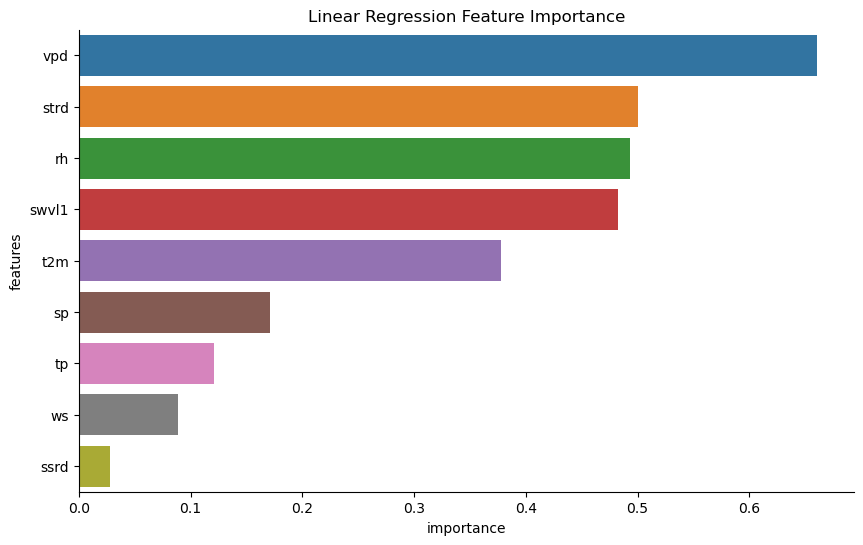

In [37]:
plot_importance(x_train.columns, np.abs(lin_reg[-1].coef_), 'Linear Regression')

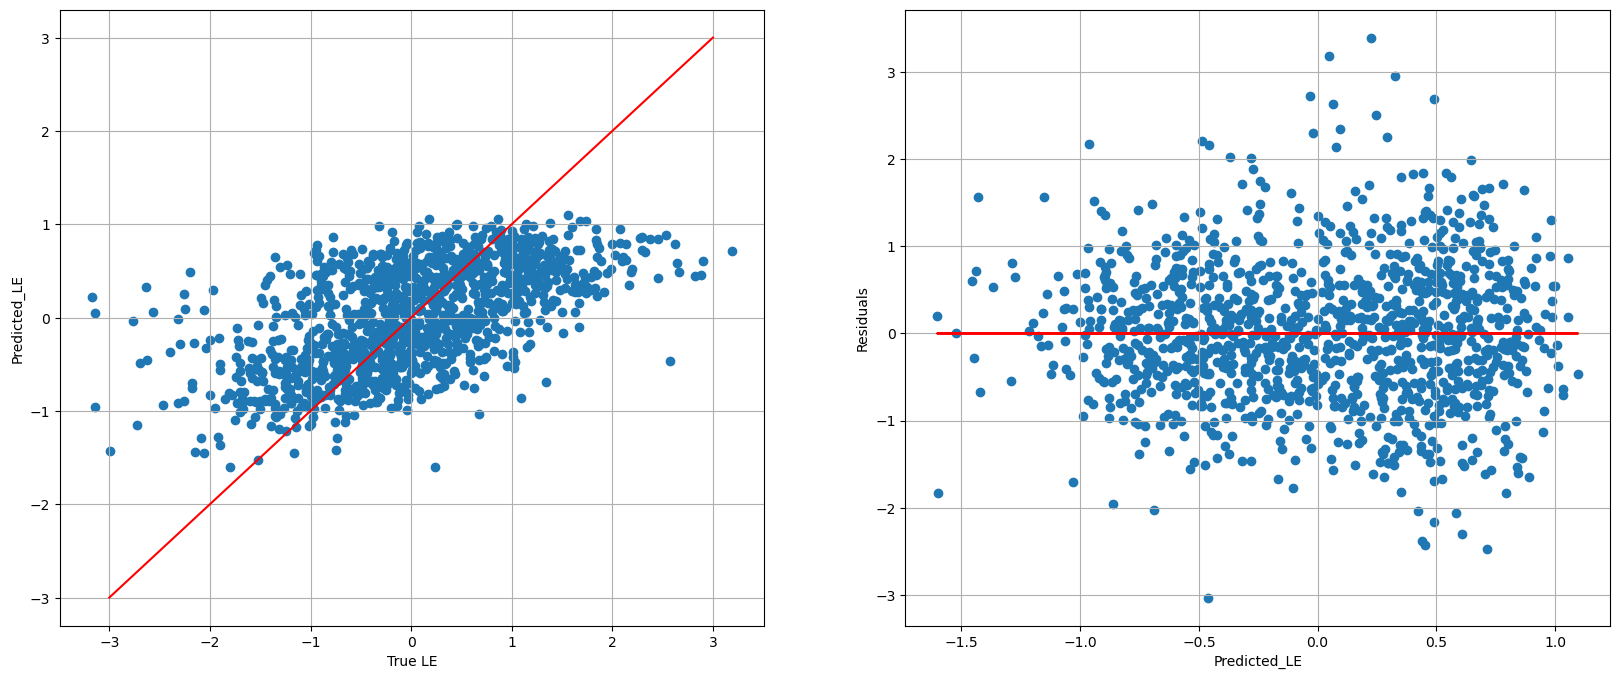

adj r2_score 0.3285938560477547
test loss 0.8027697367621192


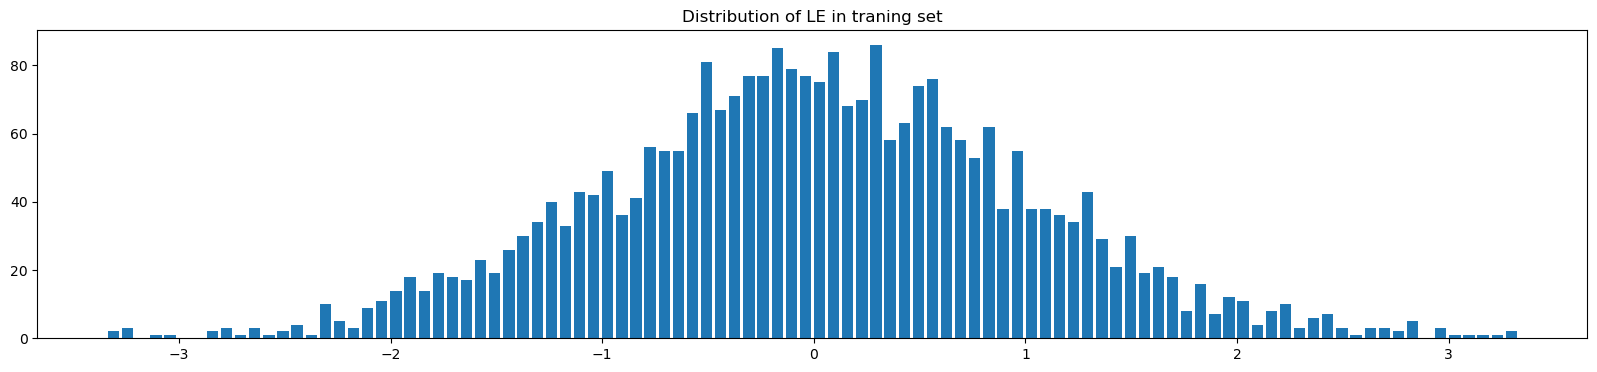

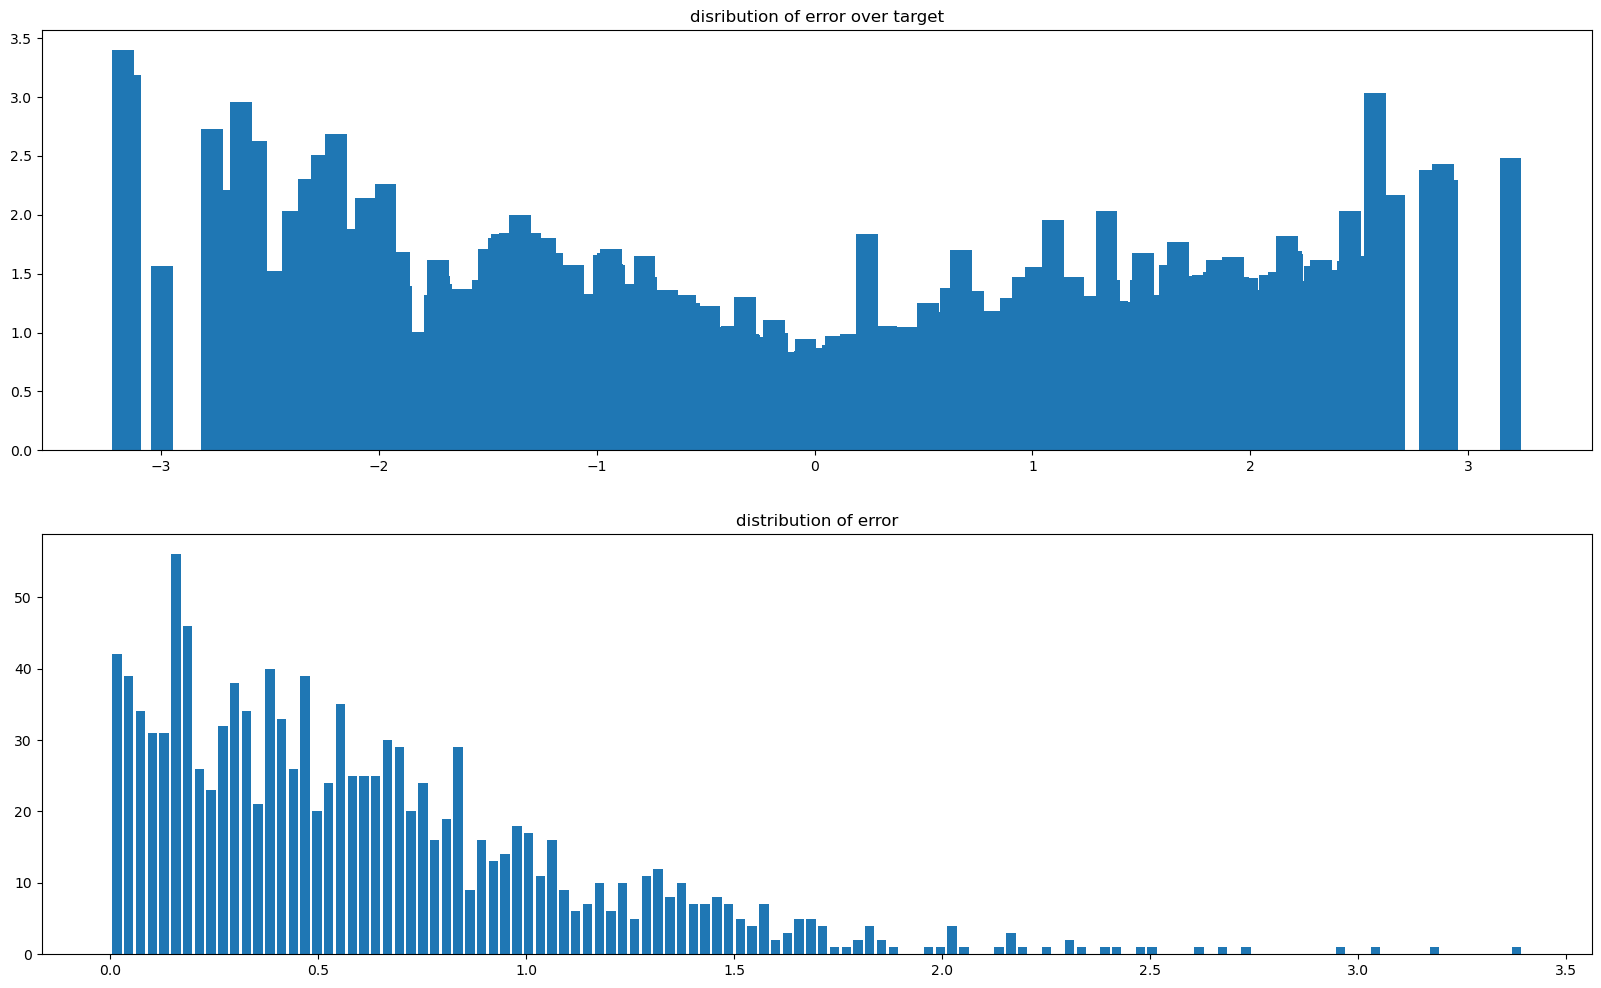

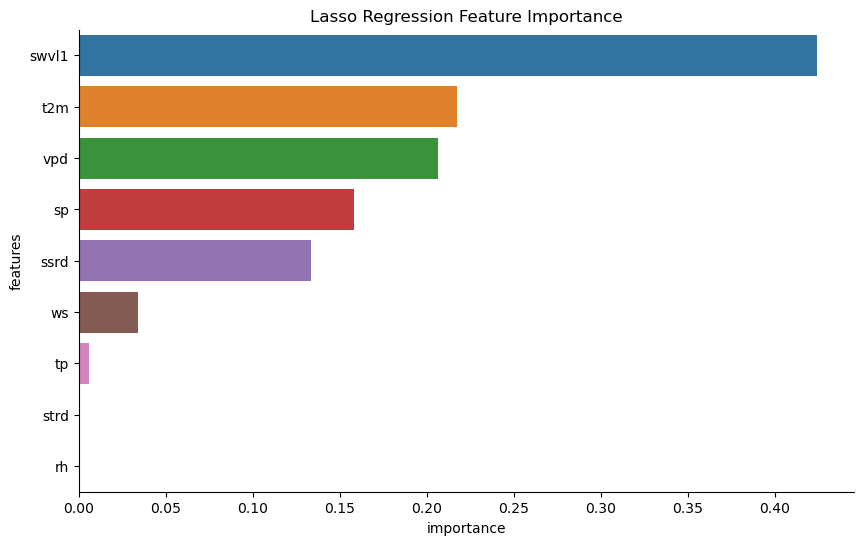

In [38]:
alpha = 0.02
lasso_reg = make_pipeline(preprocessing, Lasso(alpha = alpha))
lasso_reg.fit(x_train, y_train)
error_analysis(y_val,lasso_reg.predict(x_val))
print('adj r2_score',adj_r2(x_train.shape[1], y_val, lasso_reg.predict(x_val)))
val_adj_r2.append(adj_r2(x_train.shape[1], y_val, lasso_reg.predict(x_val)))
print('test loss',mean_squared_error(y_val, lasso_reg.predict(x_val), squared = False))
val_error.append(mean_squared_error(y_val, lasso_reg.predict(x_val), squared = False))
plt.figure(figsize=(20,4))
plt.hist(y_train, bins = 100, rwidth = 0.8)
plt.title('Distribution of LE in traning set')
plt.show()
error_distribution(y_val, lasso_reg.predict(x_val))
plot_importance(x_train.columns, np.abs(lasso_reg[-1].coef_), 'Lasso Regression')

test error 0.7446570909133519
adj r2_score 0.42228188420255175


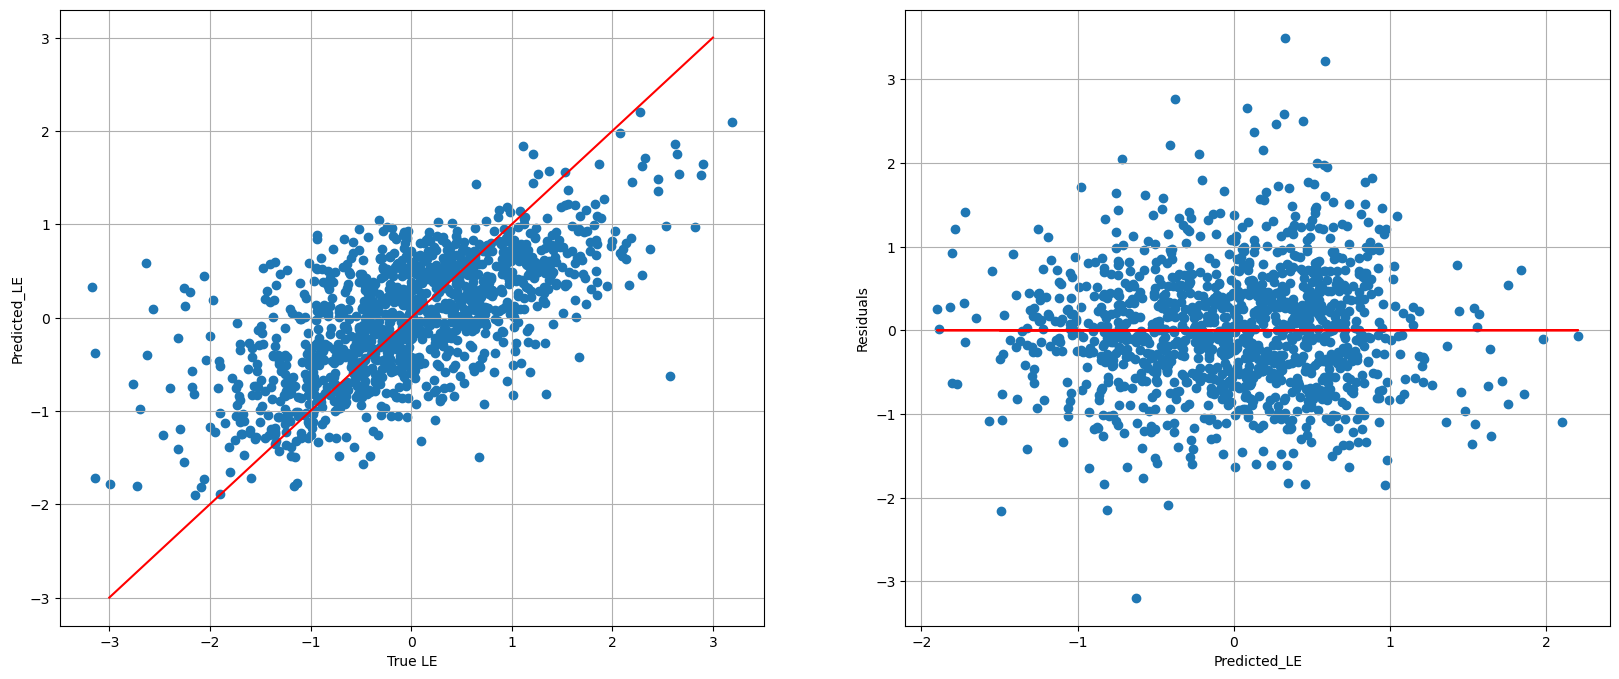

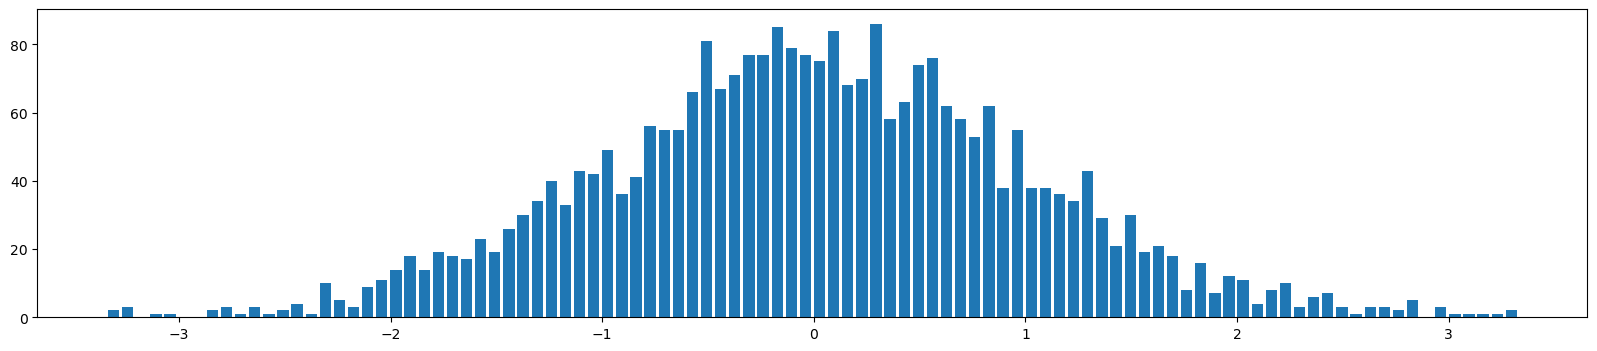

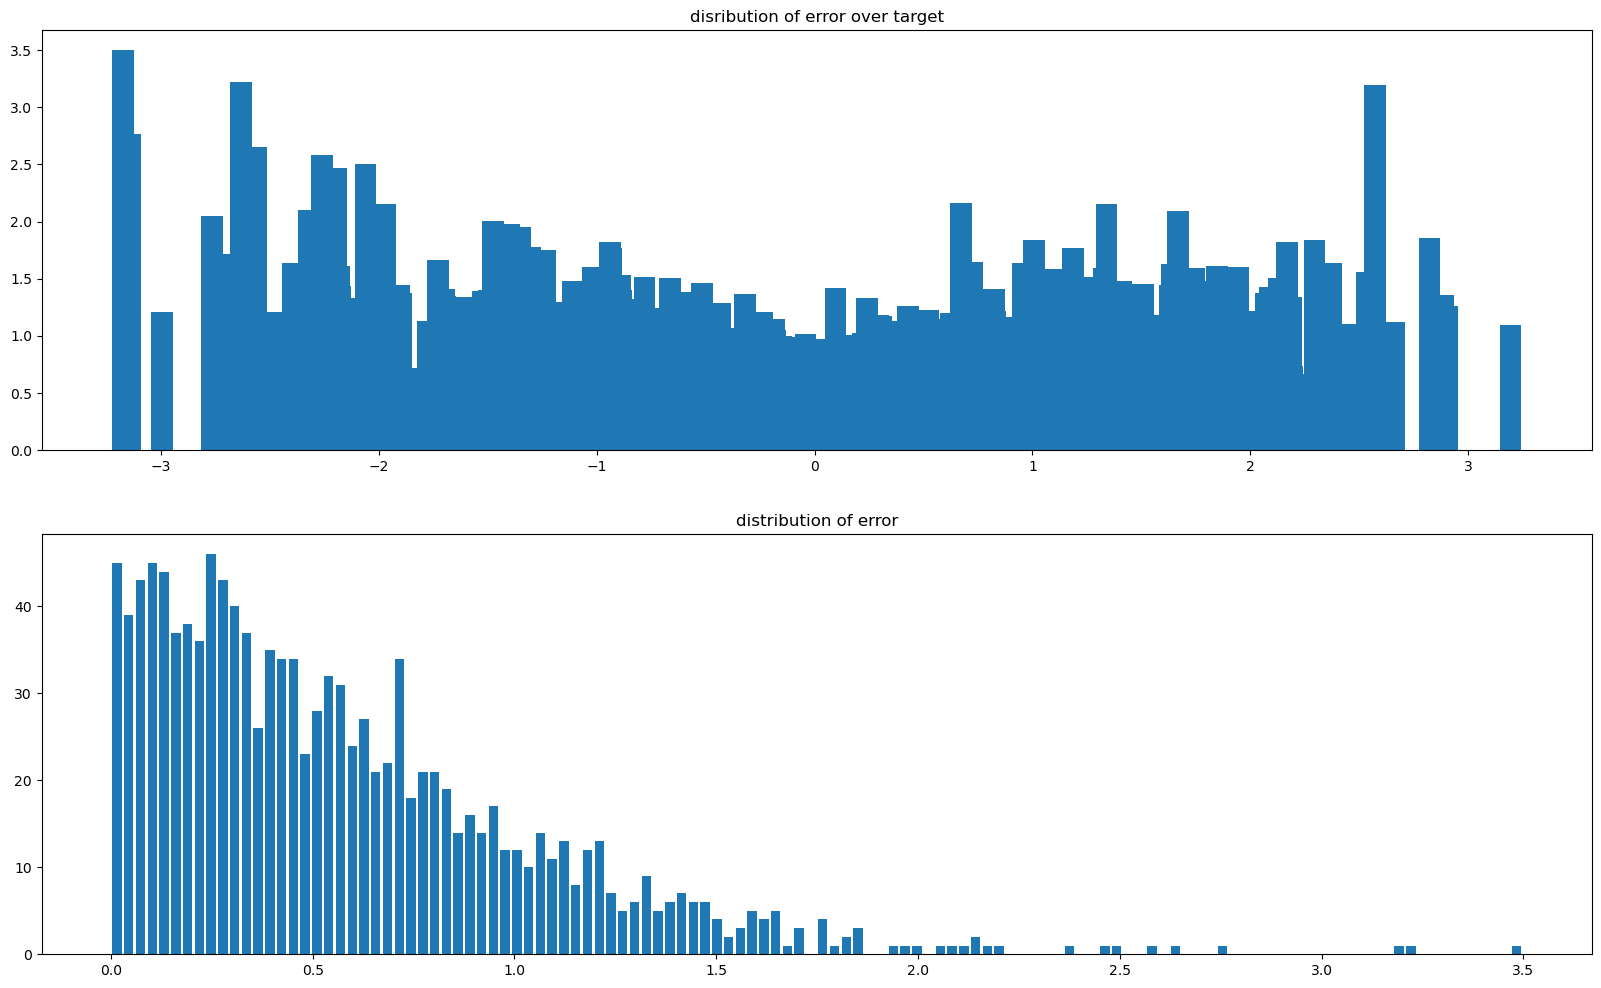

In [53]:
from sklearn.svm import SVR
svr_model = make_pipeline(preprocessing, SVR(kernel = 'rbf',gamma = 'auto',C = 0.5, epsilon = 0.1))#SVR(kernel = 'rbf',gamma = 'scale',C = 6, epsilon = 2,class_weight='balanced'))
svr_model.fit(x_train, y_train)
#test_model(svr_model, x_val, y_val,sample_weight=sample_weights)
print('test error',mean_squared_error(y_val,svr_model.predict(x_val),squared = False))
print('adj r2_score',adj_r2(x_train.shape[1], y_val, svr_model.predict(x_val)))
val_adj_r2.append(adj_r2(x_train.shape[1], y_val, svr_model.predict(x_val)))
val_error.append(mean_squared_error(y_val,svr_model.predict(x_val),squared = False))
pred = svr_model.predict(x_val)
error_analysis(y_val,pred)
plt.figure(figsize=(20,4))
plt.hist(y_train, bins = 100, rwidth = 0.8)
error_distribution(y_val, svr_model.predict(x_val))

fs = []
X_train = x_train[fs]
X_val = x_val[fs]
preprocessing = make_column_transformer((pt_pipeline,fs),
                                           remainder = scaler_pipeline)
svr_reg = make_pipeline(preprocessing, SVR(kernel = 'rbf',gamma = 'scale',C = 0.5, epsilon = 0.1))
svr_reg.fit(X_train, y_train)
print('test error',mean_squared_error(y_val,svr_reg.predict(X_val),squared = False))
print('adj r2_score',adj_r2(X_train.shape[1], y_val, svr_reg.predict(X_val)))
#val_adj_r2.append(adj_r2(x_train.shape[1], y_val, svr_model.predict(x_val)))
#val_error.append(mean_squared_error(y_val,svr_model.predict(x_val),squared = False))
pred = svr_model.predict(X_val)
error_analysis(y_val,pred)
plt.figure(figsize=(20,4))
plt.hist(y_train, bins = 100, rwidth = 0.8)
error_distribution(y_val, svr_model.predict(x_val))

test error 0.7342352048981166
adj r2_score 0.43833968968890213


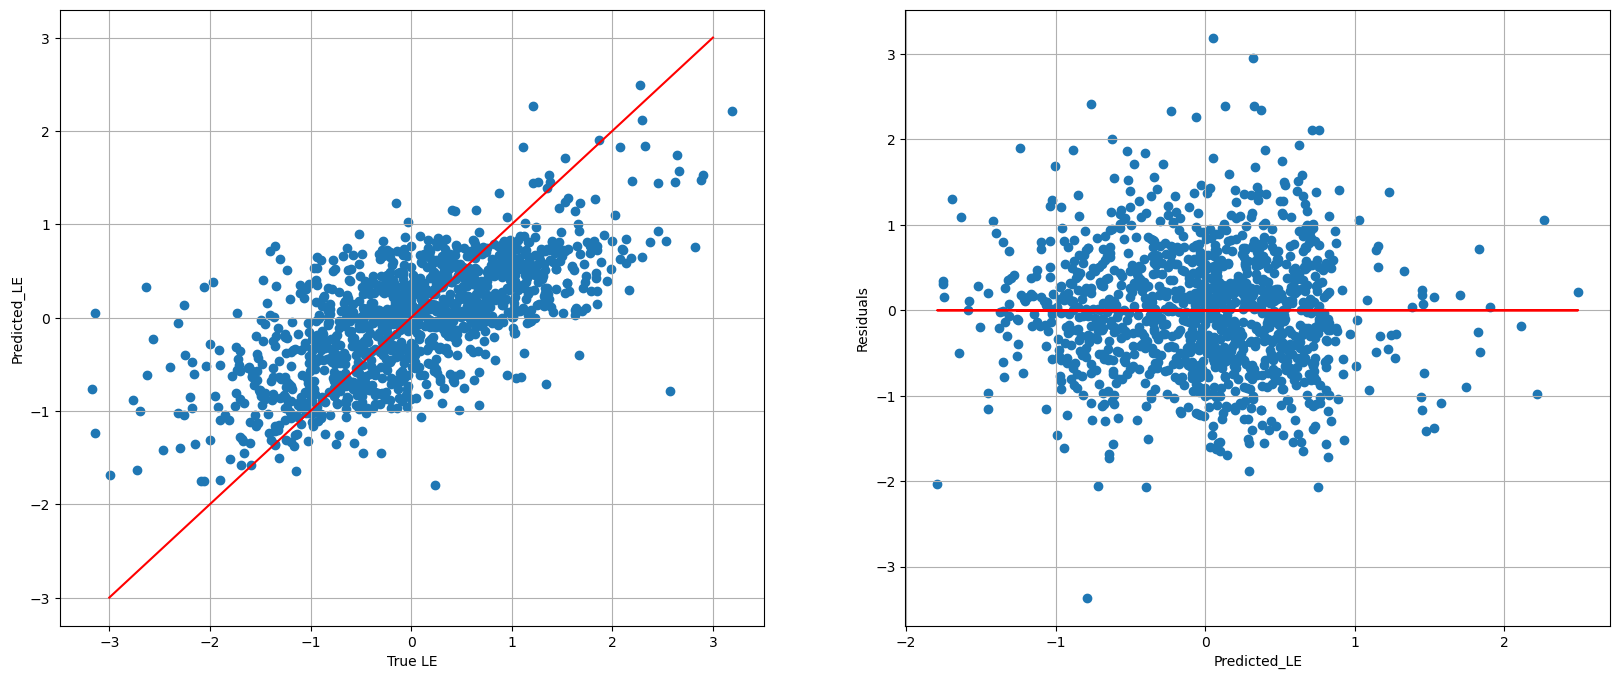

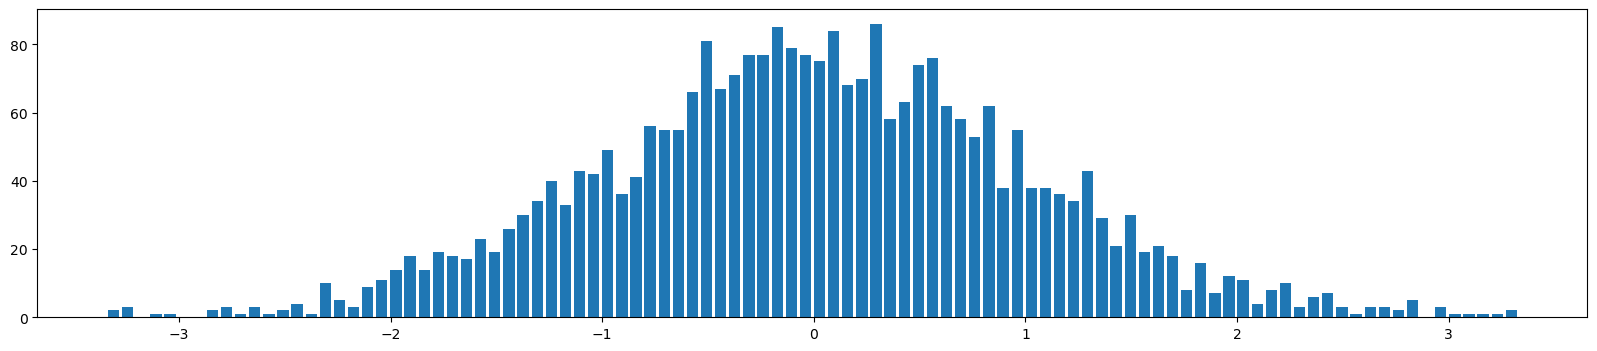

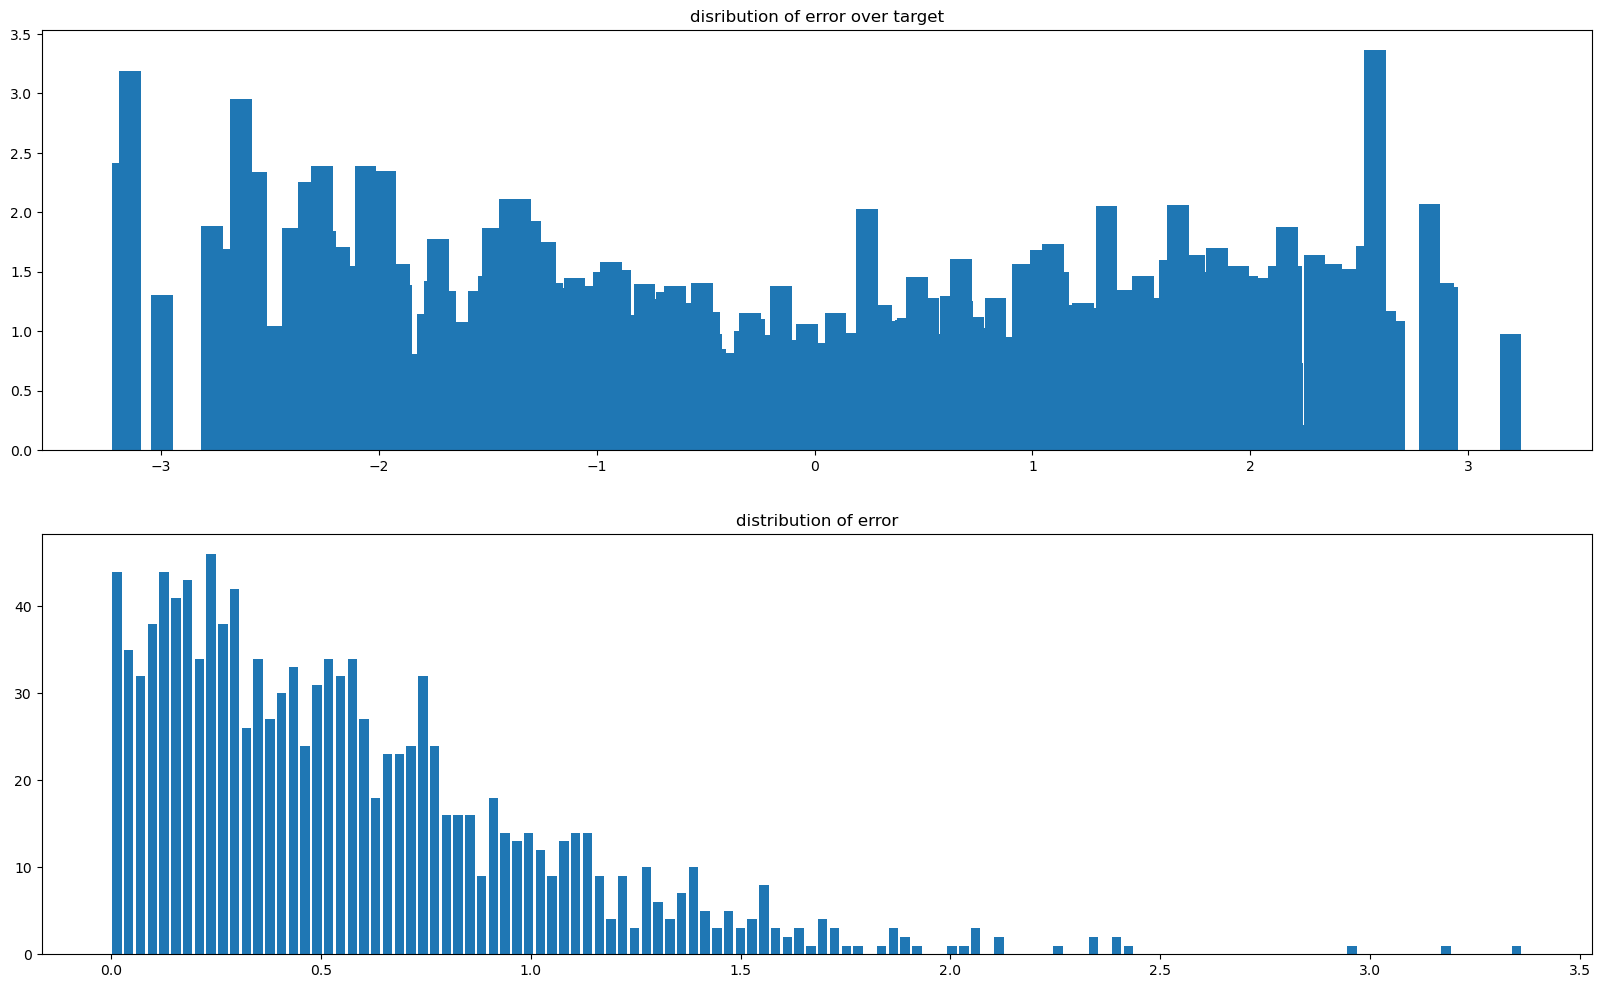

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 250, max_depth = 8, random_state = 42,n_jobs = -1)  #(70,8)
rf_reg = make_pipeline(preprocessing, rf)
rf_reg.fit(x_train, y_train)
print('test error',mean_squared_error(y_val,rf_reg.predict(x_val),squared = False))
print('adj r2_score',adj_r2(x_train.shape[1], y_val, rf_reg.predict(x_val)))
val_adj_r2.append(adj_r2(x_train.shape[1], y_val, rf_reg.predict(x_val)))
val_error.append(mean_squared_error(y_val,rf_reg.predict(x_val),squared = False))
mean_squared_error(y_val,svr_model.predict(x_val),squared = False)
pred = rf_reg.predict(x_val)
error_analysis(y_val,pred)
plt.figure(figsize=(20,4))
plt.hist(y_train, bins = 100, rwidth = 0.8)
error_distribution(y_val, rf_reg.predict(x_val))

[0.04876704 0.35940602 0.08779916 0.0360078  0.03129223 0.15261145
 0.04385899 0.06882963 0.17142767]
Index(['ws', 't2m', 'ssrd', 'strd', 'tp', 'swvl1', 'rh', 'vpd', 'sp'], dtype='object')


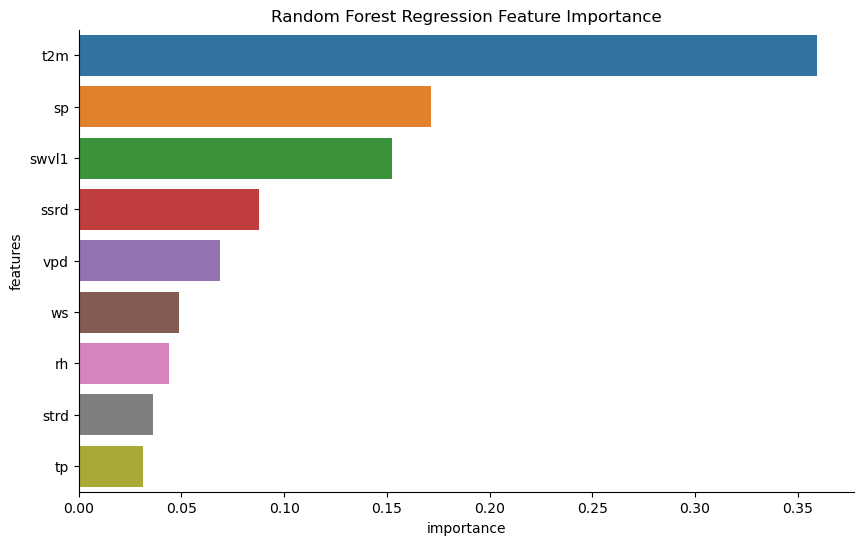

In [41]:
print(rf_reg[-1].feature_importances_)
print(x_train.columns)
plot_importance(x_train.columns, rf_reg[-1].feature_importances_, 'Random Forest Regression')

/home/krishna/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



test error 0.7358505581069525
adj r2_score 0.43586561106032806


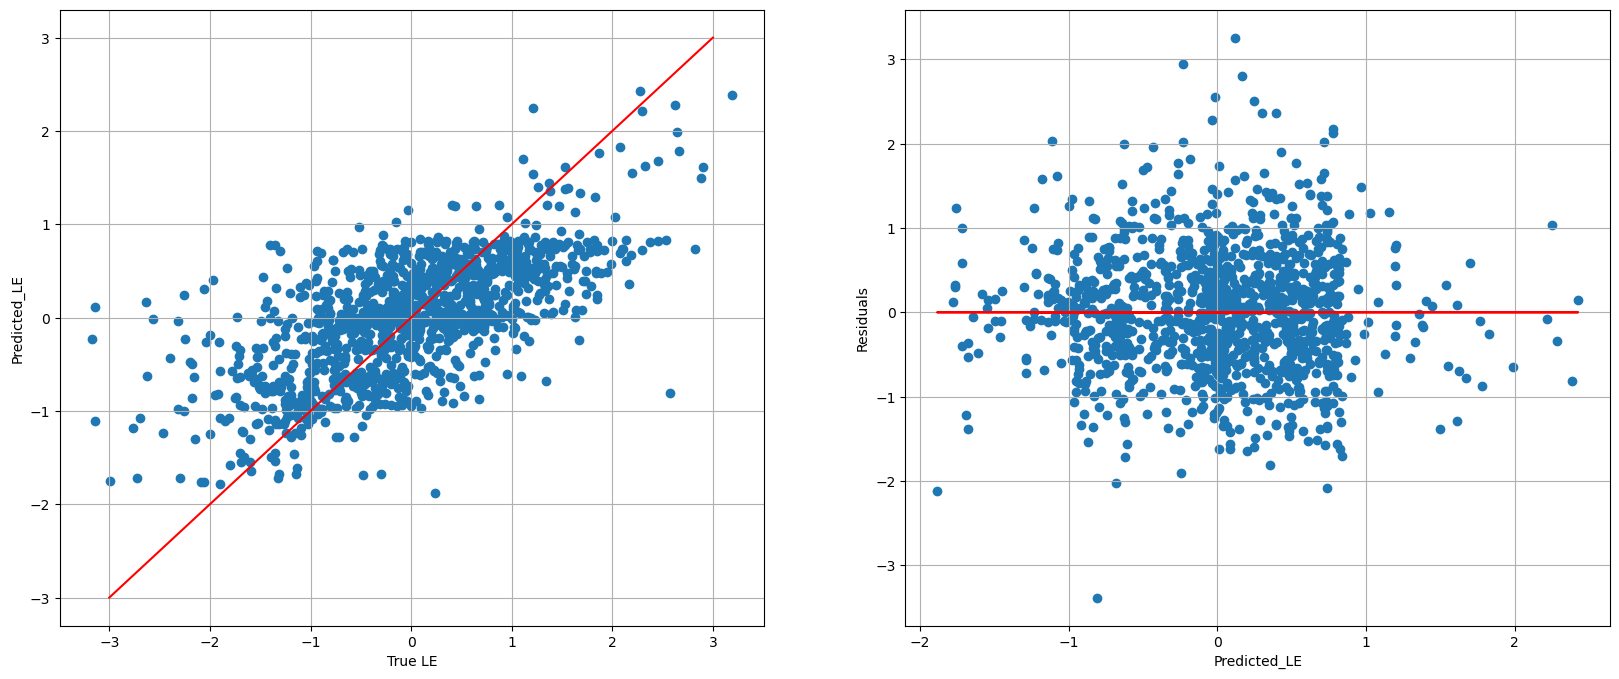

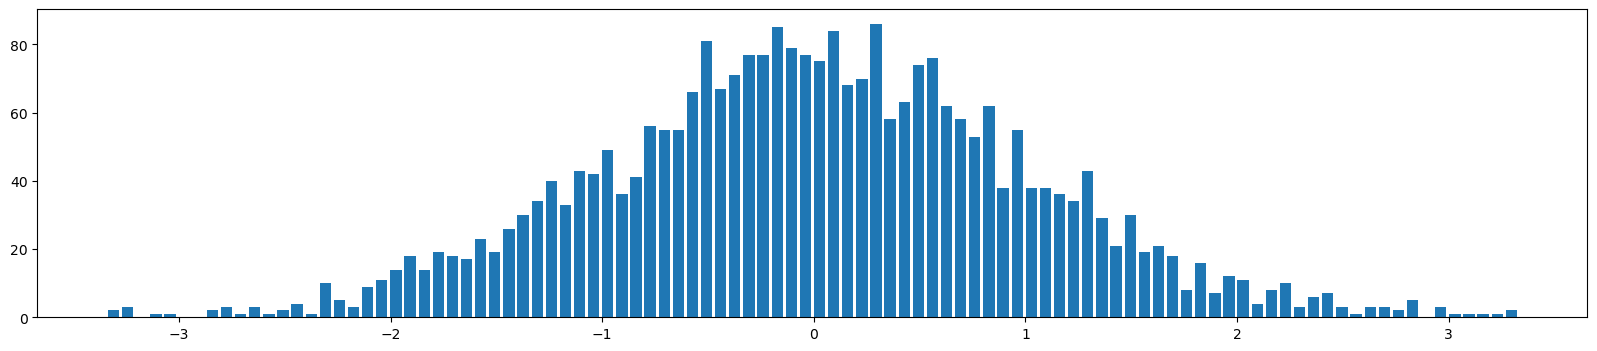

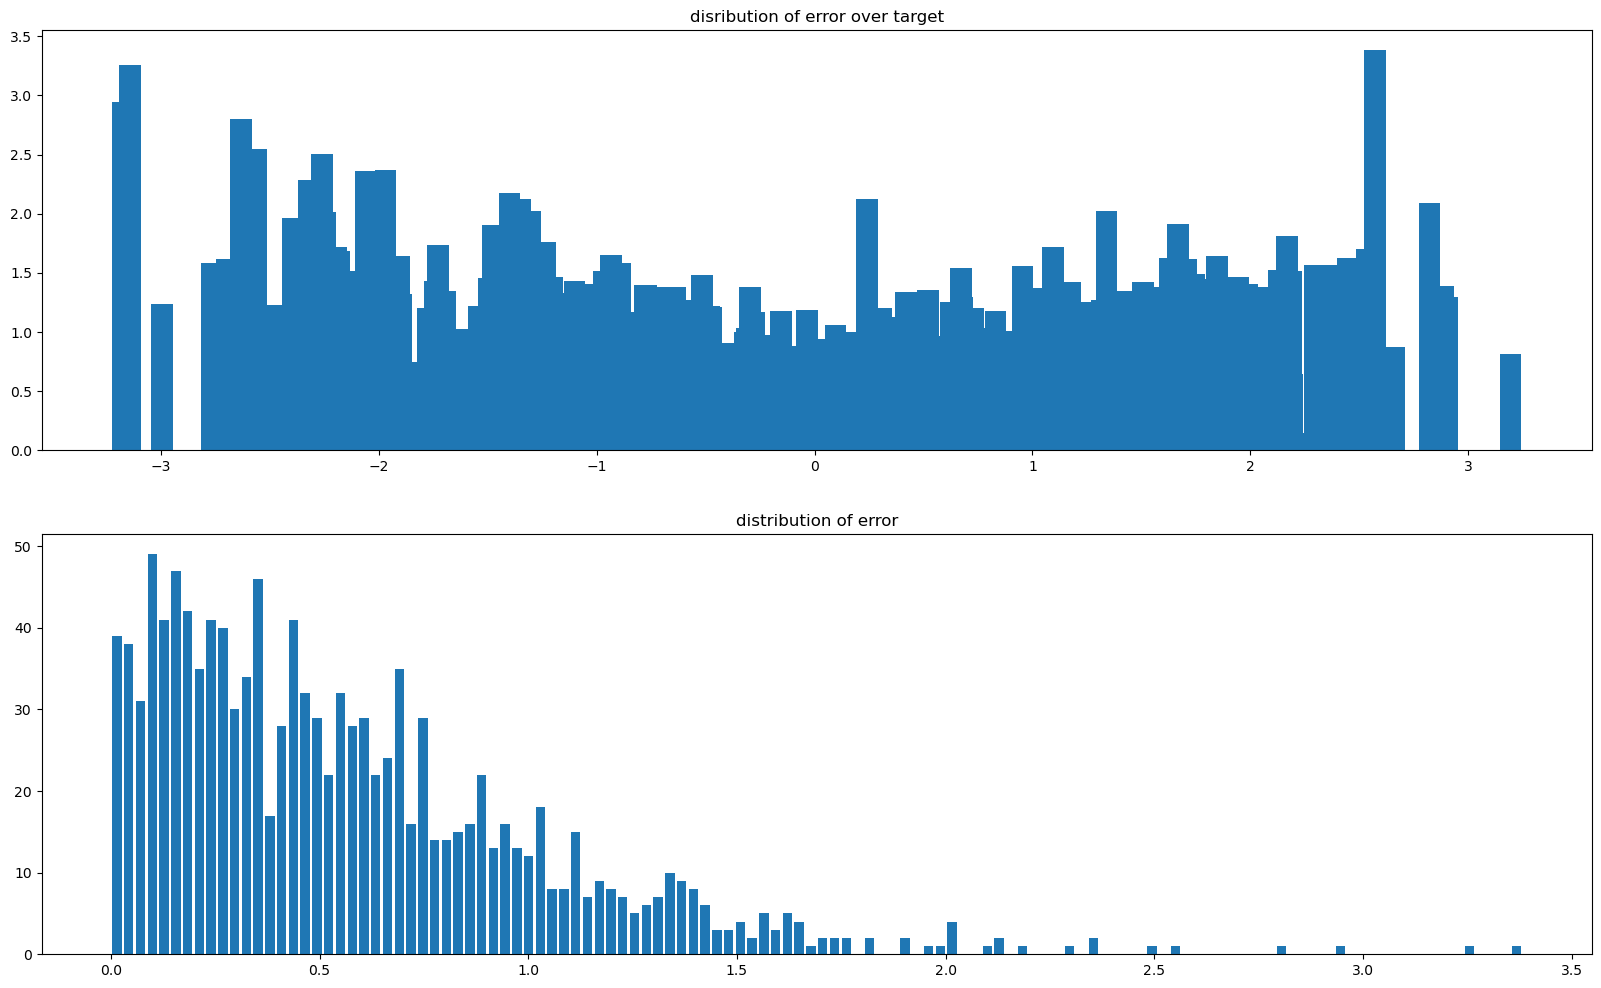

In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(max_depth = 8, random_state = 42)
ada_boost = AdaBoostRegressor(n_estimators = 100, random_state = 42, base_estimator = estimator, learning_rate = 0.01)
ada_boost_reg = make_pipeline(preprocessing, ada_boost)
ada_boost_reg.fit(x_train, y_train)
pred = ada_boost_reg.predict(x_val)
print('test error',mean_squared_error(y_val, pred,squared = False))
print('adj r2_score',adj_r2(x_train.shape[1], y_val, pred))
val_adj_r2.append(adj_r2(x_train.shape[1], y_val, pred))
val_error.append(mean_squared_error(y_val, pred,squared = False))
error_analysis(y_val,pred)
plt.figure(figsize=(20,4))
plt.hist(y_train, bins = 100, rwidth = 0.8)
error_distribution(y_val, pred)

[0.05279722 0.34625434 0.08593804 0.03761465 0.0323572  0.15279773
 0.05050021 0.06990097 0.17183964]
Index(['ws', 't2m', 'ssrd', 'strd', 'tp', 'swvl1', 'rh', 'vpd', 'sp'], dtype='object')


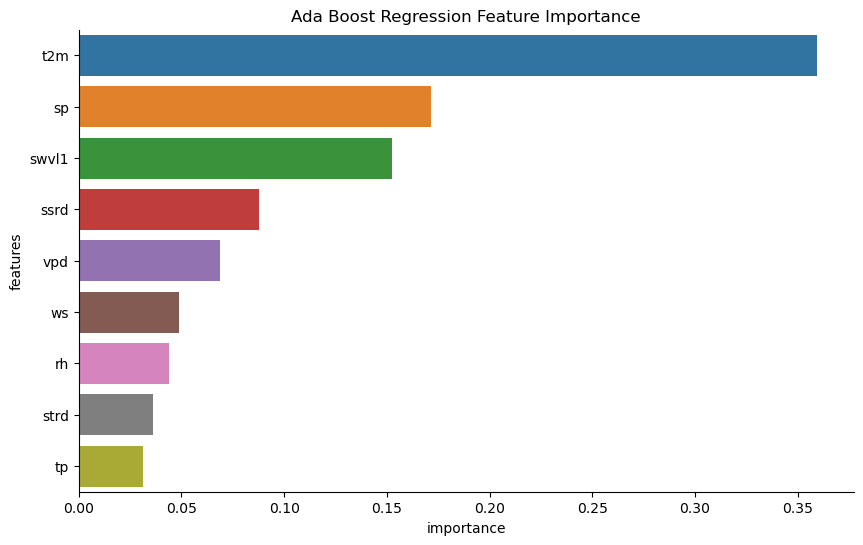

In [43]:
print(ada_boost_reg[-1].feature_importances_)
print(x_train.columns)
plot_importance(x_train.columns, rf_reg[-1].feature_importances_, 'Ada Boost Regression')

test error 0.7510155130109357
adj r2_score 0.4123738106723227


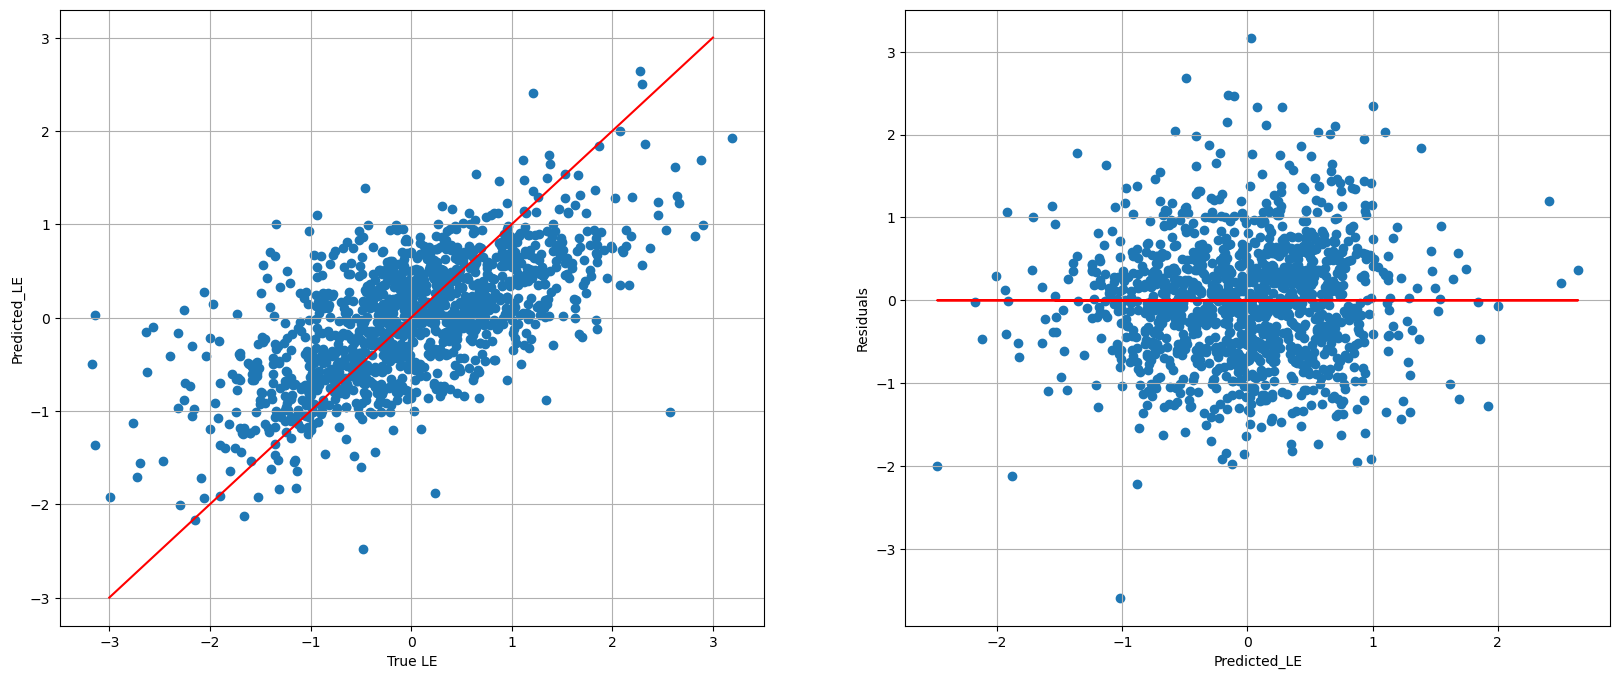

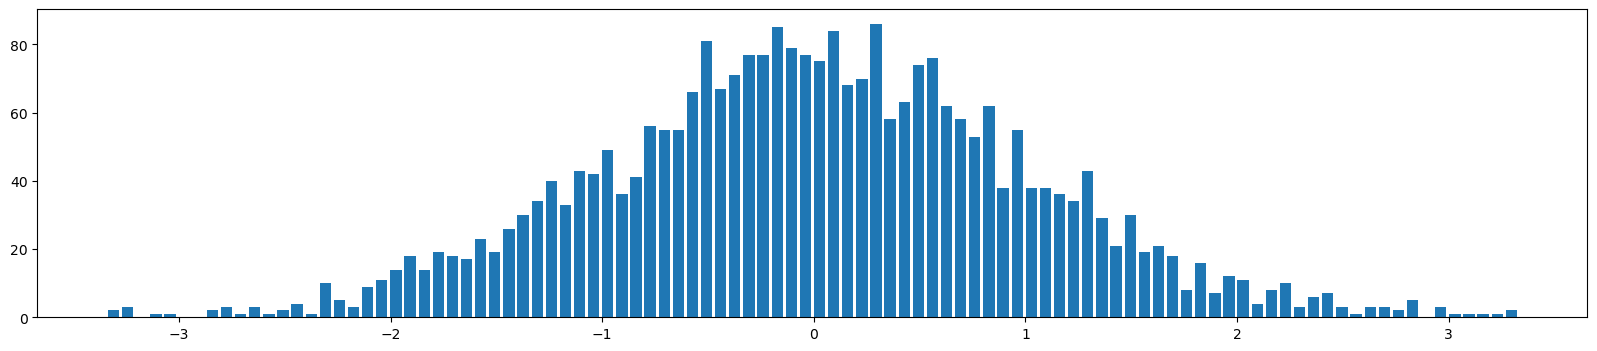

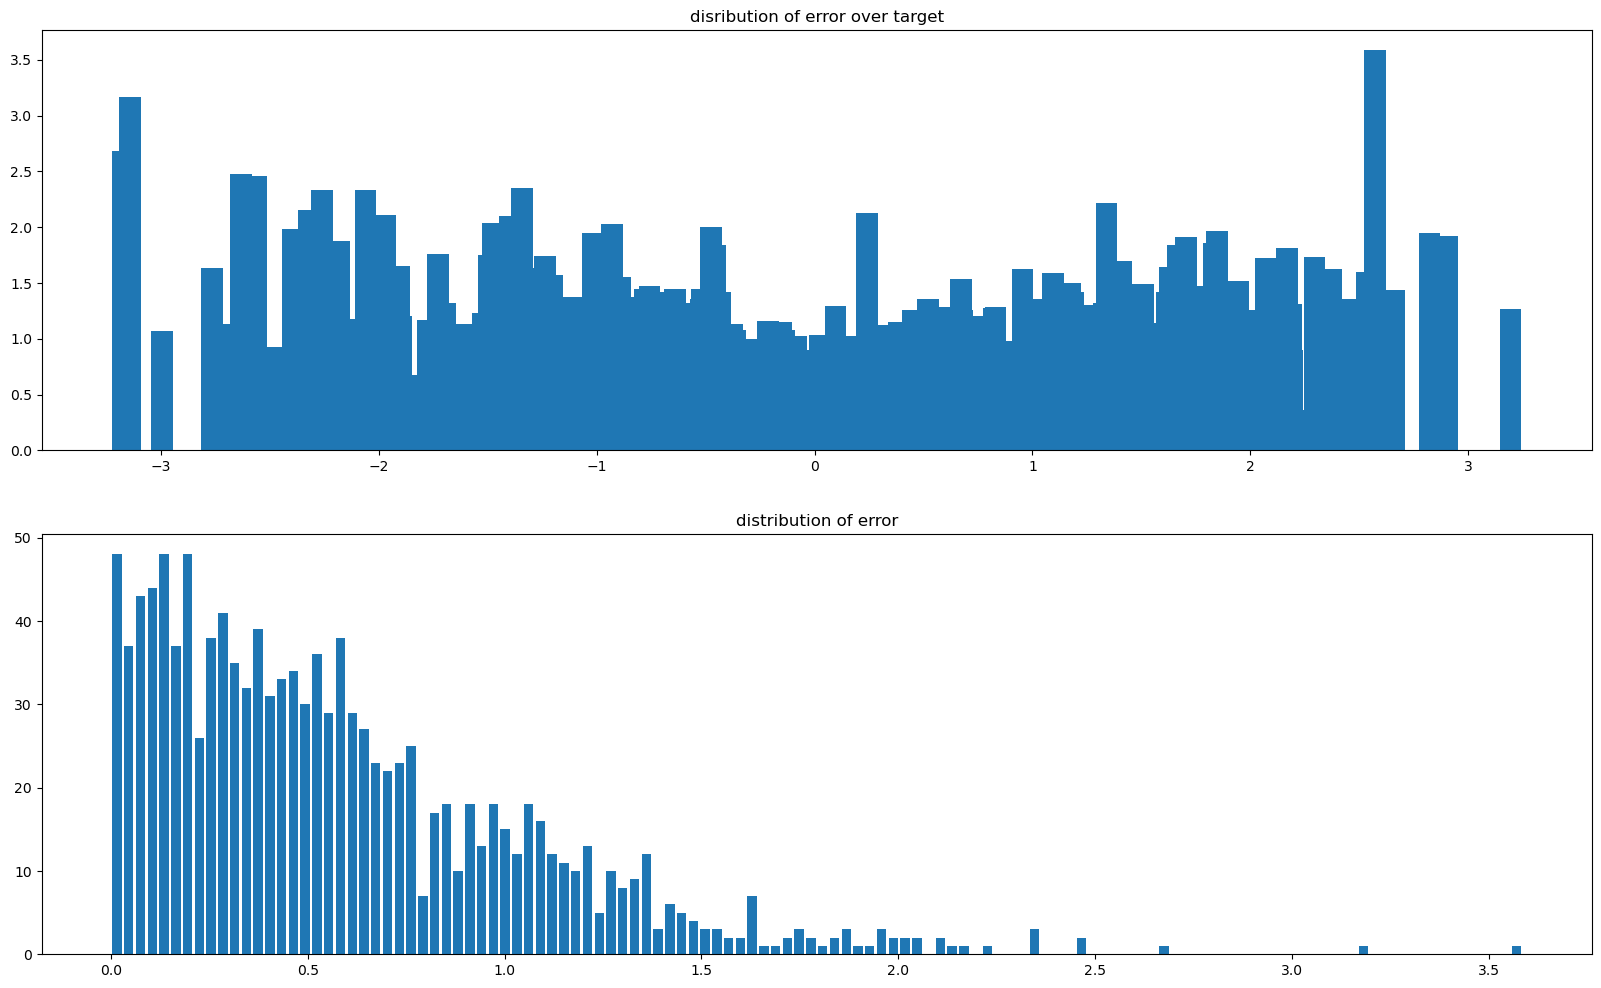

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth = 3, n_estimators = 250,learning_rate = 0.1, random_state = 42)
gbr_model = make_pipeline(preprocessing, gbr)
gbr_model.fit(x_train, y_train)
pred = gbr_model.predict(x_val)
print('test error',mean_squared_error(y_val, pred,squared = False))
print('adj r2_score',adj_r2(x_train.shape[1], y_val, pred))
val_adj_r2.append(adj_r2(x_train.shape[1], y_val, pred))
val_error.append(mean_squared_error(y_val, pred,squared = False))
error_analysis(y_val,pred)
plt.figure(figsize=(20,4))
plt.hist(y_train, bins = 100, rwidth = 0.8)
error_distribution(y_val, pred)

[0.04750449 0.3140196  0.09139681 0.04475834 0.02558665 0.17805869
 0.05523759 0.06036847 0.18306935]
Index(['ws', 't2m', 'ssrd', 'strd', 'tp', 'swvl1', 'rh', 'vpd', 'sp'], dtype='object')


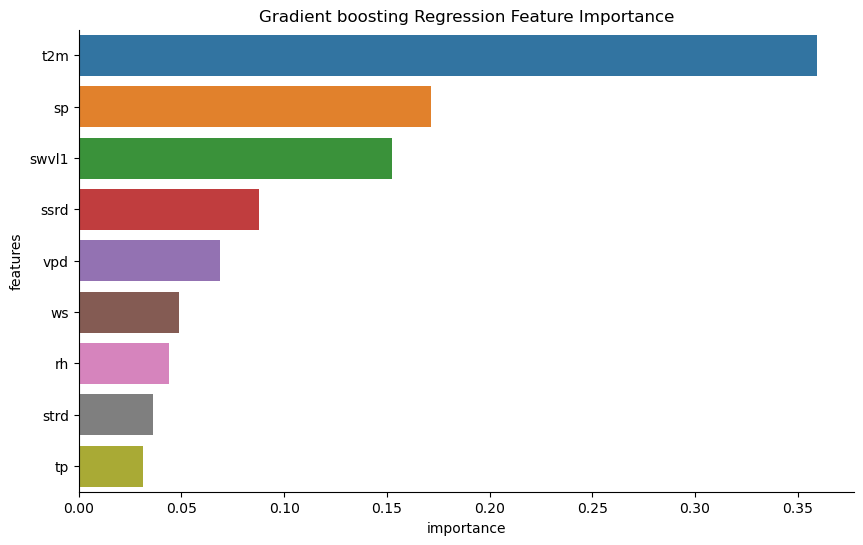

In [45]:
print(gbr_model[-1].feature_importances_)
print(x_train.columns)
plot_importance(x_train.columns, rf_reg[-1].feature_importances_, 'Gradient boosting Regression')

In [46]:
model = svr_model
mp = model.predict(train_df[x_train.columns])
mp = pt_le.inverse_transform(mp.reshape(-1,1))[:,0]
lp = lasso_reg.predict(train_df[x_train.columns])
lp = pt_le.inverse_transform(lp.reshape(-1,1))[:,0]
px.scatter(train_df, x = 'date', y = ['LE', mp, lp])

KeyError: "None of [Index(['ws', 't2m', 'ssrd', 'strd', 'tp', 'swvl1', 'rh', 'vpd', 'sp'], dtype='object')] are in the [columns]"

In [47]:
p1 = model.predict(knp_test[x_train.columns])
p1 = pt_le.inverse_transform(p1.reshape(-1,1))[:,0]
print(mean_squared_error(knp_test['LE'], p1, squared = False))
print(r2_score(knp_test['LE'],p1))
px.line(knp_test, x = 'date', y = ['LE', p1], markers = True)

23.532250871793195
0.40433795210780943


In [48]:
p_8 = np.array([p1[i - 8:i].mean() for i in range(8, len(p1), 8)])
t_8 = np.array([knp_test['LE'][i - 8:i].mean() for i in range(8, len(p1), 8)])
print(mean_squared_error(p_8, t_8, squared = False))
px.line(x = np.arange(len(p_8)), y = [t_8, p_8], markers = True)

16.63090833226125


13.818319216219404


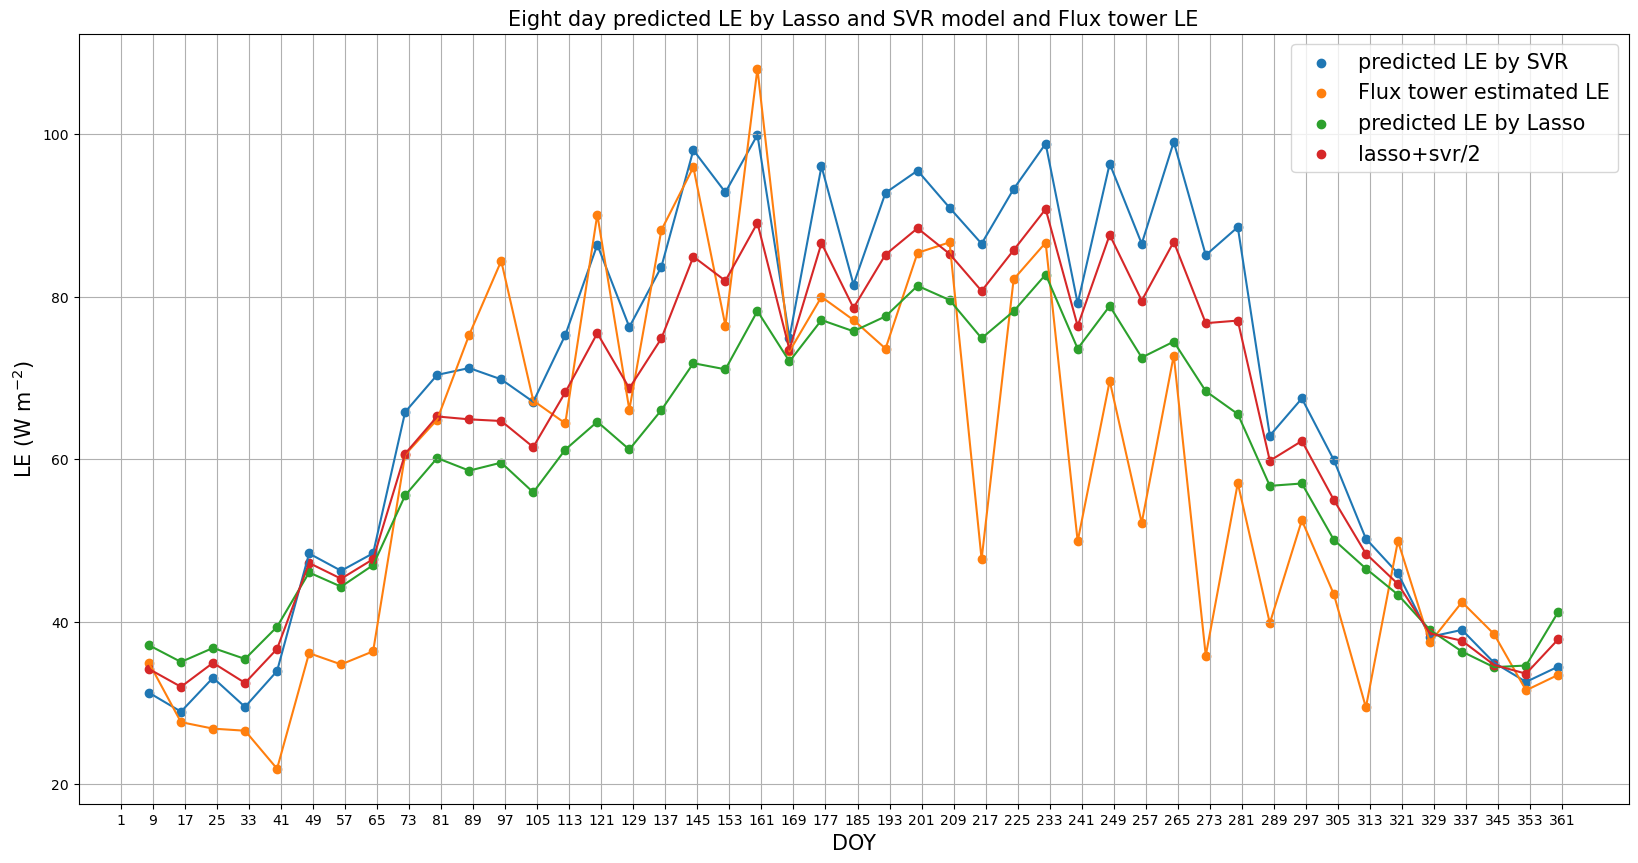

In [49]:
lp = lasso_reg.predict(knp_test[x_train.columns])
lp = pt_le.inverse_transform(lp.reshape(-1,1))[:,0]
l_8 = np.array([lp[i - 8:i].mean() for i in range(8, len(lp), 8)])
print(mean_squared_error((p_8+l_8)/2, t_8, squared = False))
plt.figure(figsize = (20,10))
#DOY = [knp_test.doy[i-8] for i in range(8, len(lp), 8)]
plt.scatter(np.arange(1,len(p_8)+1)*8, p_8, label = 'predicted LE by SVR')
plt.plot(np.arange(1,len(p_8)+1)*8, p_8)
plt.scatter(np.arange(1,len(p_8)+1)*8, t_8, label = 'Flux tower estimated LE')
plt.plot(np.arange(1,len(p_8)+1)*8, t_8)
plt.scatter(np.arange(1,len(p_8)+1)*8, l_8, label = 'predicted LE by Lasso')
plt.plot(np.arange(1,len(p_8)+1)*8, l_8)
plt.scatter(np.arange(1,len(p_8)+1)*8, (p_8+l_8)/2, label = 'lasso+svr/2')
plt.plot(np.arange(1,len(p_8)+1)*8, (p_8+l_8)/2)
plt.legend(fontsize = 15)
plt.xlabel('DOY', fontsize = 15)
plt.ylabel('LE (W m$^{-2}$)', fontsize = 15)
plt.grid(True)
plt.title('Eight day predicted LE by Lasso and SVR model and Flux tower LE', fontsize = 15)
plt.xticks(list(np.arange(0,len(p_8)+1)*8 +1))
plt.show()

In [50]:
np.arange(1,366,8)

array([  1,   9,  17,  25,  33,  41,  49,  57,  65,  73,  81,  89,  97,
       105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201,
       209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305,
       313, 321, 329, 337, 345, 353, 361])

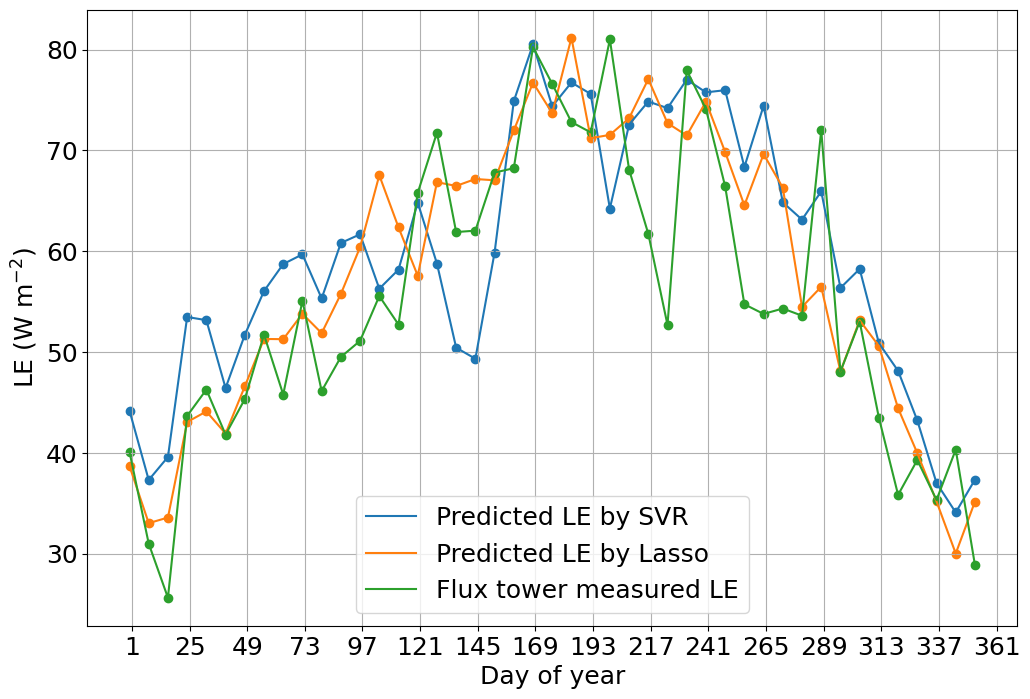

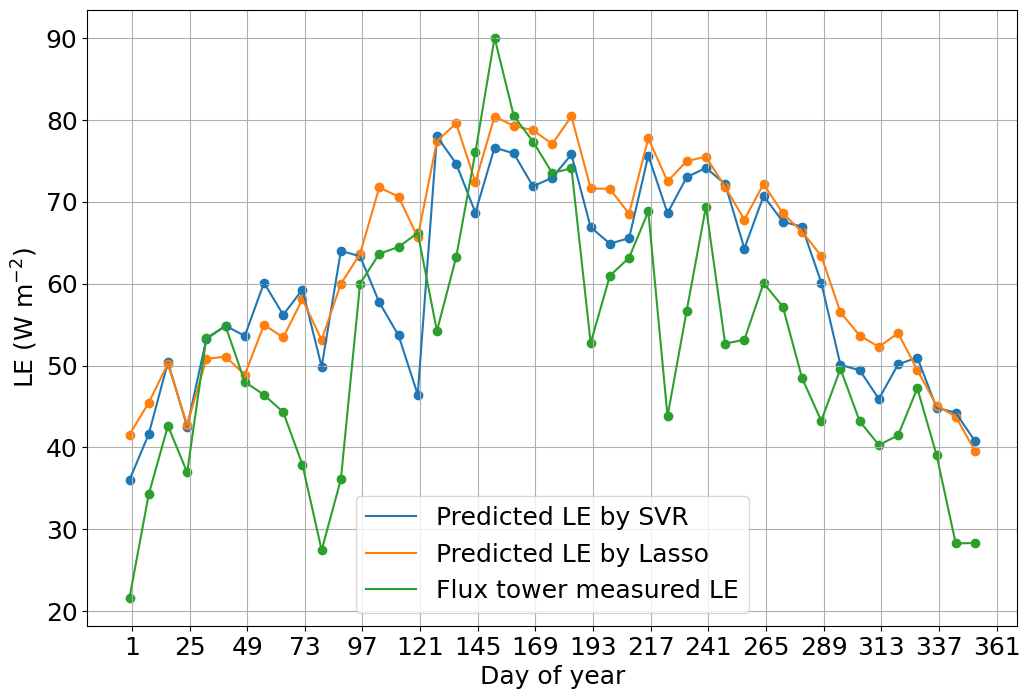

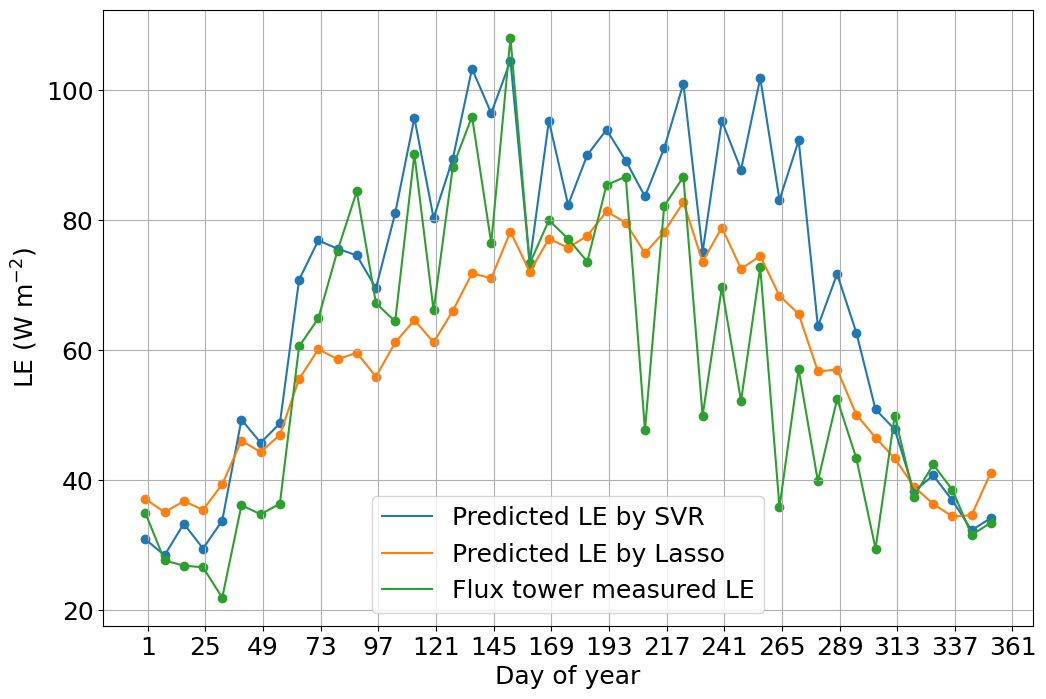

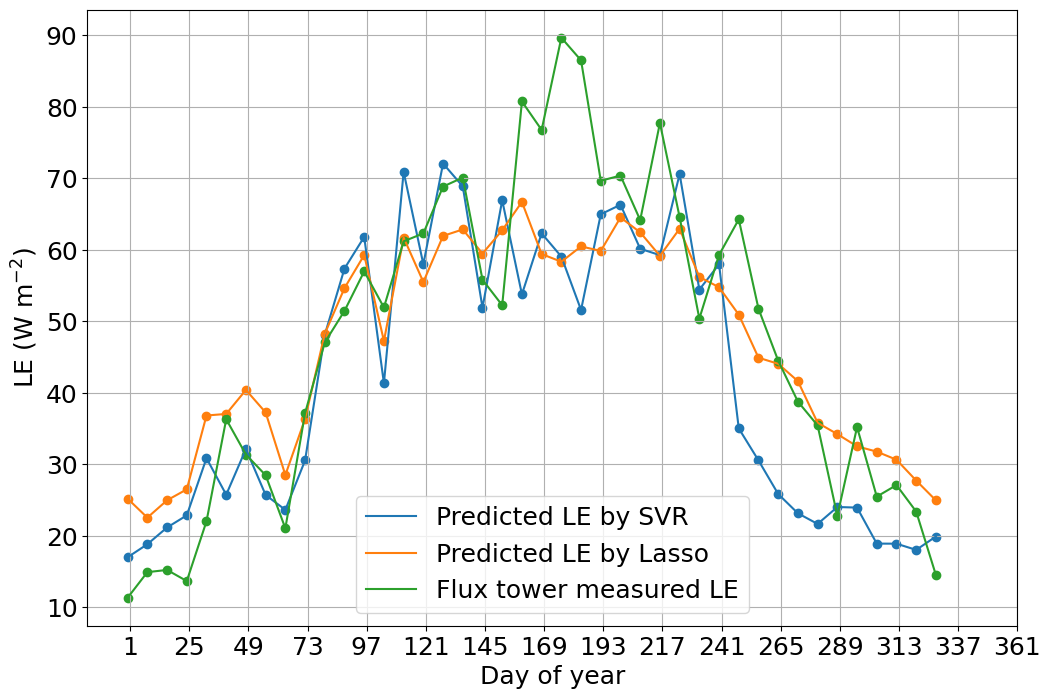

In [59]:
# plt.figure(figsize=(25,18))
model = svr_model
sites = ['ALS', 'BNS', 'KNP', 'QYZ']
for i in range(4):
    t = test[i]
    pd = model.predict(t[x_train.columns])
    pd = pt_le.inverse_transform(pd.reshape(-1,1))[:,0]
    pd_8 = np.array([pd[i - 8:i].mean() for i in range(8, len(pd), 8)])
    
    lp_ = lasso_reg.predict(t[x_train.columns])
    lp_ = pt_le.inverse_transform(lp_.reshape(-1,1))[:,0]
    l8 = np.array([lp_[i - 8:i].mean() for i in range(8, len(lp_), 8)])
    
    LE_true = np.array([t['LE'][i - 8:i].mean() for i in range(8, len(t['LE']), 8)])
    corr = np.round(np.corrcoef(LE_true, pd_8)[0,1],2)
#     plt.subplot(2,2,i+1)
    plt.figure(figsize=(12,8))
#     plt.title(t['site'].values[0])
    
    plt.plot(np.arange(len(l8))*8, pd_8, label = 'Predicted LE by SVR')#+','+'corr:'+str(corr))
    plt.scatter(np.arange(len(l8))*8, pd_8)
    
    plt.plot(np.arange(len(l8))*8, l8, label = 'Predicted LE by Lasso')
    plt.scatter(np.arange(len(l8))*8, l8)
    
    plt.plot(np.arange(len(pd_8))*8, LE_true, label = 'Flux tower measured LE')
    plt.scatter(np.arange(len(pd_8))*8, LE_true)
    
    plt.xticks(list(np.arange(1,366,24)), fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.legend(fontsize = 18, loc = 'lower center')
    plt.xlabel('Day of year', fontsize = 18)
    plt.ylabel('LE (W m$^{-2}$)', fontsize = 18)
    plt.grid('True')
    plt.savefig('plots3/'+str(sites[i])+'prediction for method ii_600dpi.png', dpi = 600)

In [51]:
import numpy as np
import pandas as pd
def adj_r2_calculate(pred, true):
    r2 = r2_score(true, pred)
    adj_r2 = 1 - ((1 - r2)*(len(true) - 1))/(len(true) - len(selected_features) - 1)
    return adj_r2
models = [lin_reg, lasso_reg, svr_model, rf_reg, ada_boost_reg, gbr_model]
errors = []
r_2s = []
adj_r2 = []
for df in test:
    e = []
    r_2 = []
    adj = []
    for mod in models:
        
        pred = mod.predict(df[selected_features])
        pred = pt_le.inverse_transform(pred.reshape(-1,1))[:,0]
        error = mean_squared_error(df['LE'], pred, squared = False)
        r_2.append(r2_score(df['LE'], pred))
        e.append(error)
        adj.append(adj_r2_calculate(pred, df['LE']))
    r_2s.append(r_2)
    errors.append(e)
    adj_r2.append(adj)
#test = [bns_test, clm_test, knp_test, qyz_test, twh_train]   
error_df = np.round(pd.DataFrame(np.array(errors).T,
             columns = ['ALS', 'KNP', 'QYZ', 'BNS', 'TWH'],
             index = ['lin', 'lasso', 'SVR', 'rf', 'ada_boost', 'gbr']
            ),2)
r2_df = np.round(pd.DataFrame(np.array(r_2s).T,
             columns = ['ALS', 'KNP', 'QYZ', 'BNS', 'TWH'],
             index = ['lin', 'lasso', 'SVR', 'rf', 'ada_boost', 'gbr']
            ),2)
adj_r2_df = np.round(pd.DataFrame(np.array(adj_r2).T,
             columns = ['ALS', 'KNP', 'QYZ', 'BNS', 'TWH'],
             index = ['lin', 'lasso', 'SVR', 'rf', 'ada_boost', 'gbr']
            ),2)
error_df

ALS    KNP    QYZ    BNS    TWH
lin        16.51  19.97  22.51  19.98  26.08
lasso      15.76  19.61  22.61  19.71  27.01
SVR        16.15  18.68  23.53  21.02  26.88
rf         16.50  18.78  24.18  22.62  27.97
ada_boost  16.73  19.05  24.39  22.24  27.43
gbr        17.41  19.13  24.05  23.32  26.94

In [52]:
r2_df

ALS   KNP   QYZ   BNS   TWH
lin        0.33  0.23  0.46  0.50  0.22
lasso      0.39  0.25  0.45  0.51  0.16
SVR        0.36  0.32  0.40  0.45  0.17
rf         0.33  0.32  0.37  0.36  0.10
ada_boost  0.32  0.30  0.36  0.38  0.14
gbr        0.26  0.29  0.38  0.32  0.17

In [53]:
adj_r2_df

ALS   KNP   QYZ   BNS   TWH
lin        0.32  0.21  0.44  0.49  0.10
lasso      0.38  0.24  0.44  0.50  0.04
SVR        0.35  0.31  0.39  0.43  0.05
rf         0.32  0.30  0.35  0.34 -0.03
ada_boost  0.30  0.28  0.34  0.36  0.01
gbr        0.24  0.27  0.36  0.30  0.04

In [54]:
one_day_error_df = pd.concat([error_df, r2_df, adj_r2_df], axis = 1)
one_day_error_df.to_csv('F:\\validation data\\oneday_error.csv')

In [55]:
val_error_df = pd.DataFrame({'adj_r2':val_adj_r2, 'RMSE':val_error},
                            index = ['linearreg', 'Lasso reg', 'SVR', 'Random Forest', 'Ads Boost Reg', 'Gradient Boosting Reg']
                           )
val_error_df

adj_r2      RMSE
linearreg              0.336685  0.797918
Lasso reg              0.328594  0.802770
SVR                    0.403164  0.756878
Random Forest          0.438344  0.734232
Ads Boost Reg          0.434107  0.736997
Gradient Boosting Reg  0.411971  0.751273

In [56]:
r2_df.mean(axis = 1)

lin          0.348
lasso        0.352
SVR          0.340
rf           0.296
ada_boost    0.300
gbr          0.284
dtype: float64

In [57]:
error_df.mean(axis = 1)

lin          21.010
lasso        20.940
SVR          21.252
rf           22.010
ada_boost    21.968
gbr          22.170
dtype: float64

In [58]:
adj_r2_df.mean(axis = 1)

lin          0.312
lasso        0.320
SVR          0.306
rf           0.256
ada_boost    0.258
gbr          0.242
dtype: float64

In [59]:
rmse_error, corr = [], []
for df in test:
    #print(df.site.values[0])
    rm, c = [], []
    for mod in models:
        #print(mod[-1])
        p1 = mod.predict(df[x_train.columns])
        p1 = pt_le.inverse_transform(p1.reshape(-1,1))[:,0]
        p_8 = np.array([p1[i - 8:i].mean() for i in range(8, len(p1), 8)])
        t_8 = np.array([df['LE'][i - 8:i].mean() for i in range(8, len(p1), 8)])
        rm.append(mean_squared_error(p_8, t_8, squared = False))
        #adjr2.append(adj_r2_calculate(p_8, t_8))
        c.append(np.corrcoef(t_8, p_8)[0,1])
    #print(rm)
    rmse_error.append(rm)
    corr.append(c)
    
error_8d_df = np.round(pd.DataFrame(np.array(rmse_error).T,
             columns = ['ALS', 'KNP', 'QYZ', 'SBN','TWH'],
             index = ['lin', 'lasso', 'SVR', 'rf', 'ada_boost', 'gbr']
            ),2)
corr_8d_df = np.round(pd.DataFrame(np.array(corr).T,
             columns = ['ALS', 'KNP', 'QYZ', 'SBN','TWH'],
             index = ['lin', 'lasso', 'SVR', 'rf', 'ada_boost', 'gbr']
            ),2)
error_8d_df

ALS    KNP    QYZ    SBN    TWH
lin        8.83  13.80  13.76  10.92  12.29
lasso      7.54  13.11  13.72  10.35  13.37
SVR        8.44  11.93  16.63  11.41  13.48
rf         8.89  11.15  17.70  14.08  13.74
ada_boost  9.05  11.46  17.93  13.63  13.58
gbr        9.60  11.74  17.34  14.24  13.27

In [60]:
print(corr_8d_df.mean(axis = 1))
corr_8d_df

lin          0.842
lasso        0.834
SVR          0.808
rf           0.796
ada_boost    0.810
gbr          0.786
dtype: float64


ALS   KNP   QYZ   SBN   TWH
lin        0.86  0.84  0.81  0.93  0.77
lasso      0.88  0.83  0.80  0.93  0.73
SVR        0.84  0.78  0.84  0.87  0.71
rf         0.84  0.79  0.87  0.82  0.66
ada_boost  0.84  0.80  0.86  0.84  0.71
gbr        0.82  0.76  0.85  0.81  0.69

In [61]:
d = pd.concat([error_8d_df, corr_8d_df], axis = 1)
d.to_csv('F:\\validation data\\eightday_error.csv')

In [62]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
sc = StandardScaler()

In [63]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape = 9))
"""
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))\
"""
#model.add(keras.layers.Dense(5, use_bias = True))
#model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.Dense(10, use_bias = True))
model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10, use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(10, use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10, use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1, activation = 'linear'))

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        if epoch<50:
            return lr0 *(1/(5*epoch+s))
        else:
            return 0.005
    return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0=5, s=20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
earlystoping = keras.callbacks.EarlyStopping(patience = 10)
modelcheckpoint = keras.callbacks.ModelCheckpoint('deep_model.h5', save_best_only = True)

optimizer = keras.optimizers.Adam(learning_rate = 0.002)
model.compile(loss = 'mean_absolute_error', optimizer = optimizer)
history = model.fit(preprocessing.fit_transform(x_train),
                    y_train,
                    epochs = 30,
                    batch_size = 15,
                    validation_data = (preprocessing.fit_transform(x_val),y_val))
                    #callbacks = [lr_scheduler])



pd.DataFrame(history.history).plot(figsize = (10,8))
plt.show()

Epoch 1/30
191/191 [==============================] - 2s 4ms/step - loss: 0.7239 - val_loss: 0.6627
Epoch 2/30
191/191 [==============================] - 1s 3ms/step - loss: 0.6698 - val_loss: 0.6303
Epoch 3/30
191/191 [==============================] - 0s 3ms/step - loss: 0.6476 - val_loss: 0.6219
Epoch 4/30
191/191 [==============================] - 0s 3ms/step - loss: 0.6433 - val_loss: 0.6178
Epoch 5/30
191/191 [==============================] - 1s 3ms/step - loss: 0.6413 - val_loss: 0.6180
Epoch 6/30
191/191 [==============================] - 1s 3ms/step - loss: 0.6328 - val_loss: 0.6071
Epoch 7/30
191/191 [==============================] - 1s 3ms/step - loss: 0.6371 - val_loss: 0.6074
Epoch 8/30
191/191 [==============================] - 1s 3ms/step - loss: 0.6275 - val_loss: 0.6094
Epoch 9/30
191/191 [==============================] - 1s 3ms/step - loss: 0.6248 - val_loss: 0.6027
Epoch 10/30
191/191 [==============================] - 1s 3ms/step - loss: 0.6176 - val_loss: 0.6010


KeyboardInterrupt



In [ ]:
#model = keras.models.load_model('deep_model.h5')
pred = model.predict(preprocessing.fit_transform(x_val))
#pred = sc.inverse_transform(pred)
pred = pred[:,0]
print(mean_squared_error(y_val, pred, squared = False))
error_analysis(y_val,pred)

In [ ]:
p = model.predict(preprocessing.fit_transform(knp_test[selected_features]))
#p = sc.inverse_transform(p)
p = pt_le.inverse_transform(p)[:,0]

print(mean_squared_error(knp_test['LE'], p, squared = False))
print(r2_score(knp_test['LE'],p))
px.line(knp_test, x = 'date', y = ['LE', p], markers = True)

In [ ]:
px.line(x = np.arange(len(y_val)), y = [y_val,pred], markers = True)

In [ ]:
NN_errors, NN_r2 = [], []
for df in test:
    p = model.predict(preprocessing.fit_transform(df[selected_features]))
    #p = sc.inverse_transform(p)
    p = pt_le.inverse_transform(p)[:,0]

    NN_errors.append(mean_squared_error(df['LE'], p, squared = False))
    NN_r2.append(r2_score(df['LE'],p))
error_df.loc['NN'] = NN_errors
r2_df.loc['NN'] = NN_r2
error_df

In [ ]:
r2_df

In [ ]:
print(f'Mean RMSE :\n{error_df.mean(axis = 1)},\nMean r2 score :\n{r2_df.mean(axis = 1)}')

# 